<a href="https://colab.research.google.com/github/TOM-BOHN/MsDS-customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.&nbsp;Abstract

# 2.&nbsp;Background

## Context

I spent 7 years working at Salesforce, one of the largest software as a service (SaaS) companies that sells its cloud software on a subscription based business model. Several of those years were spent in data visualization and business analyst roles working with the renewals organization to build and develop data science models focused on customer health and understand the risk of customers leaving the business.

The main driving focus of these projects was to understand the customer and focus on reducing the chances of customers leaving the subscription based model.  This resulted in a relentless focus on a single KPI, customer attrition (aka customer churn).

In this report, I will play the role of data scientist.  Stepping out of my business-facing role and working with a similar model that was created to predict customer attrition. While I cannot use proprietary business data for this analysis, I will find and use a publicly available customer churn dataset to emulate a similar customer context. I will also use the Random Forest classifier package, similar to the model that was implemented at the company.

## Primer on Customer Attrition

Attrition, or customer churn, can be thought of as a leaky bucket. The attrition is the bucket leaking.  In order to fill the bucket, you first must replace the water lost.  Then you can add to the contents of the bucket. Lets explore this analogy in 2 scenarios:

> **Scenario 1: No Growth**
> Let's assume that a company wants to just ride the wave of success. They have a yearly attrition rate of 10%, meaning 10% of their customers will cancel their subscription each year.  Assuming the company has no new sales, after 7 years, they will be less than half their current size.

> **Scenario 2: Growth Company**
> Let's assume that a company wants to grow by 10% each year. They have a yearly attrition rate of 10%, meaning 10% of their customers will cancel their subscription each year. This company must first sell 10% new subscriptions to replace the subscriptions lost. They then must sell 10% more to grow the company to hit its target growth.  In this scenario, the sales team must do twice the work to hit its goals.

From the two scenarios, you can see that attrition, or customer churn can be a large challenge for a company. Being able to understand what customers are going to churn (have an attrition) and why, will enable a company to better target at-risk customers.

When addressing customer attrition, a company has 2 options:
1. **Customer Success:** Focus on customer success, to keep customers happy and renew their subscription.
2. **Increase Sales:** Sell to more new customers to replace the customers canceling.

Many companies have found that being able to identify at risk customers and support them to find value from the product is a worthwhile effort.  This is commonly known as customer success.

## Objective

There will be 3 key objectives for this project.
1. Create a model to identify if a customer is likely to have an attrition event (customer churn)
2. Maximize the performance of the model using accuracy and other performance scores
3. Minimize the time taken to generate the model and calculate a prediction for a customer.


The challenge of this project will be to find a way to balance building a good model, while making it performative through hyperparameter tuning and feature reduction.

## Problem Type and Model

**Problem Type**

The problem that needs to be addressed is a **supervised learning** problem.  Supervised learning is when the model is trained with data that contains target values (true outcomes) along with features (attributes for each observation). This data is fed into a model with parameters to create predictions. Businesses will have customer information with a variety of attributes and details on their customers.  They will also have customer history and know when customers have renewed and when they have had an attrition event (customer churn).  This data can be used to train a supervised learning model.

The type of task that needs to be completed is a **binary classification** problem. A binary classification problem is one where the target values are True or False for the class. In this problem, the normal state (False) is when a customer renews with the company and the abnormal state (True) is when the customer has an attrition event (customer churn).  Customer details and these outcomes can be trained on by a binary classification model to predict, based on customer attributes, when a customer is likely to have an attrition event.

**Model Selection**

Based on the objectives, the best model is a **Random Forest** Classification model. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting [11]. Given our objective to run training and scoring quickly, this model is ideal.  A random forest can execute training in parallel processing, which is a huge advantage over boosted models that run in serial processing. In addition, random forests are better with large numbers of features and are less sensitive to overfitting. Assuming performance and quality of the model is sufficient, these features make the model a good fit for the problem.

## Dataset Selection

While true business data cannot be used, given confidential consideration, the best proxy possible be used to create and test the process outlined in the document.


The dataset selected should contain:
- A target value for customer attrition (customer churn)
- A large set of features to describe the customer (greater than 30 attributes)
- A moderate to large number of observation (greater than 1,000 records)
- Sized to run on a local computer or cloud processing engine (less than 10,000 records)


Ultimately I selected the following dataset of synthetic date to use:

Attribute                 |Details
:-------------------------|:-----------------------------
**Dataset:**              | Telco Customer Churn (11.1.3+)
**Source Type:**         | Public Dataset
**Source Link:**          | https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
**Source Documentation:** | https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Additional details on this customer curn dataset can be found in the data section of the notebook.

# 3.&nbsp;Import Required Libraries

##Python Libraries

The following python libraries are used in this notebook.

In [1]:
# File Connection and File Manipulation
import os
from google.colab import drive
# Basic Data Science Toolkits
import pandas as pd
import numpy as np
import math
import time
# Data Vizualization
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
# Data Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Data Model Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
# Import Data Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer
# Cross Validation, Grid Search, and K-Fold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## Global Variables

The following are global variables referenced in this notebook.

In [86]:
# Global Debug flag used to turn on and off more chatty blocks of code
gDEBUG = True
if gDEBUG: print('Debug is set to:', gDEBUG)
# Global Level of Detail of table stats and details
gLOD = 2
print('Level of Detail for functions is set to:', gLOD)

Debug is set to: True
Level of Detail for functions is set to: 2


# 4.&nbsp;Data

## Dataset Source

###About Dataset Provider

The datasource used in this analysis was created by the Sample Team at IBM as part of the the IBM Accelerator Catalog, a free platform created to showcase assets and demonstrate the capabilities of the IBM products. This dataset comes from a subset of this platform focused on IBM Cognos Analytics Sample Data. The dataset was packaged on the Kaggle website and is available for download through the UI or the Kaggle API.

###About Dataset

The Telco Customer Churn (11.1.3+) dataset provides insights into a fictional telecommunications company operating in California, which offered home phone and internet services to a total of 7043 customers during Q3. The dataset categorizes customers based on their decisions to leave, retain, or subscribe to the services. Notably, each customer's profile covers various significant demographic attributes, in addition to metrics such as Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. [2]

#### Initial Descriptive Details of Tables

The dataset contains information regarding customer churn within a fictional telecommunications company. It covers customer details, demographic information, customer locations, services detailed for each customer, and the attrition status of these customers.

In summary, the data is organized as follows:
- Number of tables: 5
- Number of features (columns): 48
- Number of observations (rows): 7048

## Dataset Details

### Dataset Tables
The dataset is comprised of 5 tables, focused on specific details related to the customer.  The tables are:
- **Demographics** : The **person** conceptual entity including demographic details related to each customers included in the dataset.
- **Location** : The **location** conceptual entity, including location information related to where the customer is located in the world. A less grnular form of address information.
- **Population** : Additional statisticss related to the location entity, including the population of each zipcode included in the dataset.
- **Services** : The **transaction** entity in a summerized format, outlining the services / prducts consumed, actions taken by the customer, and transaction / billing details related to the customers purchase.
- **Status** : Additional derived statistics related to the person entity, including survey details, derived scores, and churn information related to each customer.

### Dataset Relationships

The **Services** table is the main fact in the data model.

The following relationships can be used to join the data:
- **Services** joined to **Demographics** joined on CustomerID = CustomerID
- **Services** joined to **Status** joined on CustomerID = CustomerID
- **Demographics** joined to **Location** joined on CustomerID = CustomerID
- **Location** joined to **Population** joined on ZipCode = ZipCode

## Dataset Dictionary

Datails on each field in the original dataset can be found in the following data dictionary.

###Demographics
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Gender**: The customer's gender: Male, Female
- **Age**: The customer's current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
- **Married**: Indicates if the customer is married: Yes, No
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents**: Indicates the number of dependents that live with the customer.

### Location
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country**: The country of the customer's primary residence.
- **State**: The state of the customer's primary residence.
- **City**: The city of the customer's primary residence.
- **Zip Code**: The zip code of the customer's primary residence.
- **Lat Long**: The combined latitude and longitude of the customer's primary residence.
- **Latitude**: The latitude of the customer's primary residence.
- **Longitude**: The longitude of the customer's primary residence.

###Population
- **ID**: A unique ID that identifies each row.
- **Zip Code**: The zip code of the customer's primary residence.
- **Population**: A current population estimate for the entire Zip Code area.

###Services
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Referred a Friend**: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals**: Indicates the number of referrals to date that the customer has made.
- **Tenure in Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer**: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges**: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download**: Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music**: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data**: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge**: Indicates the customer's current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer's total charges, calculated to the end of the quarter specified above.
- **Total Refunds**: Indicates the customer's total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter specified above.

### Status
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Satisfaction Score**: A customer's overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Satisfaction Score Label**: Indicates the text version of the score (1-5) as a text string.
- **Customer Status**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **Churn Score Category**: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- **CLTV Category**: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
- **Churn Category**: A high-level category for the customer's reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
- **Churn Reason**: A customer's specific reason for leaving the company. Directly related to Churn Category.

## Import Dataset to Notebook

### Connect to Kaggle API

In [3]:
# Prepare to Connect to Kaggle API with Token

# Create a Kaggle API Token
#- Log into your kaggle account, navigate to theAPI section
#- Create a New API Token, triggering the downloaf of the kaggle.json file
#- Go to this Google Colab Notebook step and proceed

# Mount the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

#from google.colab import files
#files.upload()
#prompt open to upload kaggle.json

# Location for moving kaggle API token
source_filepath = '/content/gdrive/MyDrive/Colab_files/kaggle.json'
destination_filepath = '/content'
!cp {source_filepath} {destination_filepath}

#Verify the kaggle.json file is present
!ls -lha kaggle.json

#Install kaggle API
!pip install -q kaggle

#Move kaggle.json file to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#check the directory before downloading the datasets
!pwd

#Sanity Check for Connection
#!kaggle datasets list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root 66 Aug 14 20:26 kaggle.json
/content


### Import Dataset from Kaggle

In [4]:
#Import the Kaggle Data Source
#Define the source of the dataset
kaggle_owner_name = 'ylchang'
kaggle_dataset_name = 'telco-customer-churn-1113'
kaggle_dataset = kaggle_owner_name + '/' + kaggle_dataset_name
print(kaggle_dataset)

#Define the destination of the dataset
dest_path = '/content'
dest_folder = ''
dest_dataset = dest_path + dest_folder
print(dest_dataset)

#Download the kaggle dataset
!kaggle datasets download -d {kaggle_dataset} -p {dest_dataset}

#Unzip the files
zip_file_name = kaggle_dataset_name + '.zip'
!mkdir {kaggle_dataset_name}
print(zip_file_name)
!unzip -o {zip_file_name} -d {kaggle_dataset_name}

ylchang/telco-customer-churn-1113
/content
telco-customer-churn-1113.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘telco-customer-churn-1113’: File exists
telco-customer-churn-1113.zip
Archive:  telco-customer-churn-1113.zip
  inflating: telco-customer-churn-1113/Telco_customer_churn.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_demographics.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_location.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_population.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_services.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_status.xlsx  


Reference for Connecting to Kaggle

*   Steps to download Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/156610
*   Easy way to use Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/51898
*   Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

## Pre-Processing

As the data is contained in 5 separate tables, ##  HERE ##

#### Covert Files to Dataframes

In [5]:
def get_dataset_filenames(dest_dataset, kaggle_dataset_name):
  import os
  #Get the list of files imported
  directory_path = dest_dataset + '/' + kaggle_dataset_name
  directory_files = os.listdir(directory_path)
  print(directory_files)
  return directory_files

In [6]:
# Create a dictonary to store the datafames imported
def create_dict_of_dataframes(directory_files):
  df_dict = {}

  for file in directory_files:
    dataset_file = dest_dataset + '/' + kaggle_dataset_name + '/' + file
    df_dict[file] = pd.read_excel(dataset_file)
    print("key: ", file)
    #print(df_dict[file], "\n")
  return df_dict

In [7]:
directory_files =  get_dataset_filenames(dest_dataset, kaggle_dataset_name)
df_dict = create_dict_of_dataframes(directory_files)

['Telco_customer_churn_demographics.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn.xlsx', 'Telco_customer_churn_population.xlsx', 'Telco_customer_churn_status.xlsx']
key:  Telco_customer_churn_demographics.xlsx
key:  Telco_customer_churn_services.xlsx
key:  Telco_customer_churn_location.xlsx
key:  Telco_customer_churn.xlsx
key:  Telco_customer_churn_population.xlsx
key:  Telco_customer_churn_status.xlsx


####Drop Unneccisary Fields

In [8]:
def quick_table_details (df_name, df, level_of_detail = 10):
  if level_of_detail >= 1:
    print('\n####', df_name, '####')
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print('number of features (columns) = ' + str(num_cols))
    print('number of observations (rows) = ' + str(num_rows))
    print('----------------------------')
  if level_of_detail >= 2:
    print(df.dtypes.value_counts())
    print('----------------------------')
  if level_of_detail >= 3:
    print(df.columns)
    print('----------------------------')
  #if level_of_detail >= 4:
    #print(df.count)
    #print(df.max)
    #print(df.min)
    #print(df.shape)
    #print(df.describe)

In [9]:
LOD = gLOD
for df_name, df in df_dict.items():
  quick_table_details(df_name, df, LOD)


#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    6
int64     3
dtype: int64
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64       5
dtype: int64
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object     5
int64      2
float64    2
dtype: int64
----------------------------

#### Telco_customer_churn.xlsx ####
number of features (columns) = 33
number of observations (rows) = 7043
----------------------------
object     24
int64       6
float64     3
dtype: int64
----------------------------

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (row

In [10]:
def pre_process_drop_fields(df_name, df, fields_to_drop, LOD = 10):
  quick_table_details(df_name, df, LOD)
  #Drop fields not useful to the predictive model
  print('Executing the drop process:')
  for field in fields_to_drop:
    if field in df.columns:
      df = df.drop(field, axis=1)
      print('\n', '[-]', 'field =', field, 'dropped.')
    else:
      print('\n', '[!]', 'field =', field, 'is not in the DataFrame.')
  # Display a summary of table statistics
  quick_table_details(df_name, df ,LOD)
  if LOD >= 3: print('\n', df.describe(include='all'), '\n')
  return df

In [11]:
def create_pp_fields_to_drop():
  dict_ftd = {'df_name' : [],
                        'fields_to_drop' : []
                        }
  dict_ftd['df_name'].append('Telco_customer_churn_population.xlsx')
  dict_ftd['fields_to_drop'].append(['ID'])
  dict_ftd['df_name'].append('Telco_customer_churn_location.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Lat Long', 'Latitude', 'Longitude'])
  dict_ftd['df_name'].append('Telco_customer_churn_demographics.xlsx')
  dict_ftd['fields_to_drop'].append(['Count'])
  dict_ftd['df_name'].append('Telco_customer_churn_services.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Quarter'])
  dict_ftd['df_name'].append('Telco_customer_churn_status.xlsx')
  dict_ftd['fields_to_drop'].append(['Count', 'Quarter'])

  return dict_ftd

In [12]:
dict_fields_to_drop = create_pp_fields_to_drop()
LOD = 1

print('Fields to Drop in Pre-processing:', '\n', pd.DataFrame(dict_fields_to_drop), '\n')

iter = len(dict_fields_to_drop['df_name'])
for i in range(iter):
  #extract the parameters from the dictionary
  df_name = dict_fields_to_drop['df_name'][i]
  fields_to_drop = dict_fields_to_drop['fields_to_drop'][i]
  #execute the pre-process function
  df_dict[df_name] = pre_process_drop_fields(df_name = df_name, df = df_dict[df_name],
                                          fields_to_drop = fields_to_drop, LOD = LOD)

Fields to Drop in Pre-processing: 
                                   df_name  \
0    Telco_customer_churn_population.xlsx   
1      Telco_customer_churn_location.xlsx   
2  Telco_customer_churn_demographics.xlsx   
3      Telco_customer_churn_services.xlsx   
4        Telco_customer_churn_status.xlsx   

                           fields_to_drop  
0                                    [ID]  
1  [Count, Lat Long, Latitude, Longitude]  
2                                 [Count]  
3                        [Count, Quarter]  
4                        [Count, Quarter]   


#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (rows) = 1671
----------------------------
Executing the drop process:

 [-] field = ID dropped.

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 2
number of observations (rows) = 1671
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9


#### Join and Drop Keys

In [13]:
def create_wide_dataframe(df_dict, LOD):
  df_s = pd.DataFrame(df_dict['Telco_customer_churn_demographics.xlsx'])
  df_s = df_s.merge(df_dict['Telco_customer_churn_location.xlsx'], how='left', on='Customer ID')
  df_s = df_s.merge(df_dict['Telco_customer_churn_population.xlsx'], how='left', on='Zip Code')
  df_s = df_s.merge(df_dict['Telco_customer_churn_services.xlsx'], how='left', on='Customer ID')
  df_s = df_s.merge(df_dict['Telco_customer_churn_status.xlsx'], how='left', on='Customer ID')
  quick_table_details('consolidated data frame', df_s ,LOD)
  return df_s

In [14]:
df_s = create_wide_dataframe(df_dict = df_dict, LOD = gLOD)
if gDEBUG: print('\n', df_s, '\n')
if gDEBUG: print('\n', df_s.describe(include='all'), '\n')


#### consolidated data frame ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------

      Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0     8779-QRDMV    Male   78       No            Yes      No         No   
1     7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2     1658-BYGOY    Male   71       No            Yes      No        Yes   
3     4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4     4846-WHAFZ  Female   80       No            Yes     Yes        Yes   
...          ...     ...  ...      ...            ...     ...        ...   
7038  2569-WGERO  Female   30       No             No      No         No   
7039  6840-RESVB    Male   38       No             No     Yes        Yes   
7040  2234-XADUH  Female   30       No             No     Yes        Yes   
7041  4801-JZAZL  F

## Summary of Data

### Input Data Descriptive Statistics

In [15]:
quick_table_details('df_s', df_s , gLOD)
print('\n', df_s, '\n')
print('\n', df_s.describe(include='all'), '\n')


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------

      Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0     8779-QRDMV    Male   78       No            Yes      No         No   
1     7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2     1658-BYGOY    Male   71       No            Yes      No        Yes   
3     4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4     4846-WHAFZ  Female   80       No            Yes     Yes        Yes   
...          ...     ...  ...      ...            ...     ...        ...   
7038  2569-WGERO  Female   30       No             No      No         No   
7039  6840-RESVB    Male   38       No             No     Yes        Yes   
7040  2234-XADUH  Female   30       No             No     Yes        Yes   
7041  4801-JZAZL  Female   32       No

# 5.&nbsp;Data Clensing

### Preview the Dataset

In [16]:
# preview all columns of the table:
if gDEBUG:
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', 1000)
  print(df_s.head(5))
else:
  pd.reset_option('display.max_columns')
  pd.reset_option('display.width')
  print(df_s.head(5))

  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  Number of Dependents        Country       State         City  Zip Code  Population Referred a Friend  Number of Referrals  Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines Internet Service Internet Type  Avg Monthly GB Download Online Security Online Backup Device Protection Plan Premium Tech Support Streaming TV Streaming Movies Streaming Music Unlimited Data        Contract Paperless Billing   Payment Method  Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  Satisfaction Score Customer Status Churn Label  Churn Value  Churn Score  CLTV   Churn Category                  Churn Reason
0  8779-QRDMV    Male   78       No            Yes      No         No                     0  United States  California  Los Angeles     90022       68701                No                    0                 1     None            

### Data Type Munging

In [17]:
def dtype_review_update(df, completed_list):
  all_cols = df.columns
  remaining_cols = set(all_cols)
  for i in range(len(completed_list)):
    remaining_cols = remaining_cols - set(completed_list[i])
  remaining_cols = list(remaining_cols)

  #Pritn a summary of columns remaining
  print('There are ', len(remaining_cols), 'columns to still map.')
  print(remaining_cols)
  if gDEBUG: print()
  if gDEBUG: print(df_s.dtypes[remaining_cols])

  return remaining_cols

def explain_dtype_cols(df, data_type):
  print(df.select_dtypes(data_type).info())
  if gDEBUG: print()
  if gDEBUG: print(df.select_dtypes(data_type).describe(include='all'))

def convert_dtype_bool(df, bool_cols, LOD = 10):
  for elt in bool_cols:
    df[elt] = df[elt].map({'Yes':True ,'No':False,
                          'yes':True ,'no':False,
                          True:True ,False:False,})
    df[elt] = df[elt].astype('bool')

  #Summarize changes made
  print('Corrected data type for', len(bool_cols), 'boolean columns.')
  print()
  if LOD >= 2: explain_dtype_cols(df, data_type = 'bool')

  return df

def convert_dtype_basic(df, data_type, col_list, LOD = 10):
  for elt in col_list:
    df[elt] = df[elt].astype(data_type)

  #Summarize changes made
  print('Corrected data type for', len(col_list), '', data_type, 'columns.')
  print()
  if LOD >= 2: explain_dtype_cols(df, data_type = data_type)

  return df

def dtype_update_completed(df, dtype_list, completed_list):
  print('Completed update of data type for', len(df.columns), 'columns.')
  for i in range(len(completed_list)):
      print('-- Corrected or validated data type for', len(completed_list[i]), '', dtype_list[i], 'columns.')
  if gDEBUG: print('')
  if gDEBUG: print(df.info())

In [18]:
# covert to boolean fields
LOD = 2
bool_cols = ['Under 30', 'Married', 'Senior Citizen', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
             'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
             'Streaming Music',	'Unlimited Data', 'Paperless Billing', 'Churn Label']

df_s = convert_dtype_bool(df = df_s, bool_cols = bool_cols, LOD = LOD)

Corrected data type for 18 boolean columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Under 30                7043 non-null   bool 
 1   Senior Citizen          7043 non-null   bool 
 2   Married                 7043 non-null   bool 
 3   Dependents              7043 non-null   bool 
 4   Referred a Friend       7043 non-null   bool 
 5   Phone Service           7043 non-null   bool 
 6   Multiple Lines          7043 non-null   bool 
 7   Internet Service        7043 non-null   bool 
 8   Online Security         7043 non-null   bool 
 9   Online Backup           7043 non-null   bool 
 10  Device Protection Plan  7043 non-null   bool 
 11  Premium Tech Support    7043 non-null   bool 
 12  Streaming TV            7043 non-null   bool 
 13  Streaming Movies        7043 non-null   bool 
 14  Streaming Music         704

In [19]:
print(df_s.select_dtypes('int64').columns)
print(df_s.select_dtypes('float64').columns)

Index(['Age', 'Number of Dependents', 'Zip Code', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Extra Data Charges', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV'], dtype='object')
Index(['Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Revenue'], dtype='object')


In [20]:
# Convert String, Int, and Float fields
str_cols = ['Customer ID']
int_cols = ['CLTV', 'Churn Value', 'Number of Referrals', 'Avg Monthly GB Download', 'Satisfaction Score', 'Tenure in Months', 'Age', 'Number of Dependents', 'Population', 'Churn Score']
float_cols = ['Total Revenue', 'Monthly Charge', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Charges', 'Total Extra Data Charges']

df_s = convert_dtype_basic(df = df_s, data_type = 'object', col_list = str_cols)
df_s = convert_dtype_basic(df = df_s, data_type = 'int64', col_list = int_cols)
df_s = convert_dtype_basic(df = df_s, data_type = 'float64', col_list = float_cols)

Corrected data type for 1  object columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer ID      7043 non-null   object
 1   Gender           7043 non-null   object
 2   Country          7043 non-null   object
 3   State            7043 non-null   object
 4   City             7043 non-null   object
 5   Offer            7043 non-null   object
 6   Internet Type    7043 non-null   object
 7   Contract         7043 non-null   object
 8   Payment Method   7043 non-null   object
 9   Customer Status  7043 non-null   object
 10  Churn Category   1869 non-null   object
 11  Churn Reason     1869 non-null   object
dtypes: object(12)
memory usage: 715.3+ KB
None

       Customer ID Gender        Country       State         City Offer Internet Type        Contract   Payment Method Customer Status Churn Category                   Ch

In [21]:
completed_list = [bool_cols, str_cols, int_cols, float_cols]

fields_to_review = dtype_review_update(df = df_s, completed_list = completed_list)

There are  12 columns to still map.
['Gender', 'Country', 'Zip Code', 'Customer Status', 'State', 'Churn Reason', 'Churn Category', 'Payment Method', 'Contract', 'Offer', 'Internet Type', 'City']

Gender             object
Country            object
Zip Code            int64
Customer Status    object
State              object
Churn Reason       object
Churn Category     object
Payment Method     object
Contract           object
Offer              object
Internet Type      object
City               object
dtype: object


In [22]:
# covert to categorical fields
cat_cols = ['Offer', 'Gender', 'Internet Type', 'Contract', 'Payment Method', 'State', 'Country', 'Churn Reason', 'City', 'Customer Status', 'Churn Category', 'Zip Code']

df_s = convert_dtype_basic(df = df_s, data_type = 'category', col_list = cat_cols)

Corrected data type for 12  category columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           7043 non-null   category
 1   Country          7043 non-null   category
 2   State            7043 non-null   category
 3   City             7043 non-null   category
 4   Zip Code         7043 non-null   category
 5   Offer            7043 non-null   category
 6   Internet Type    7043 non-null   category
 7   Contract         7043 non-null   category
 8   Payment Method   7043 non-null   category
 9   Customer Status  7043 non-null   category
 10  Churn Category   1869 non-null   category
 11  Churn Reason     1869 non-null   category
dtypes: category(12)
memory usage: 271.5 KB
None

       Gender        Country       State         City  Zip Code Offer Internet Type        Contract   Payment Method Customer Status Churn

In [23]:
completed_list = [bool_cols, str_cols, int_cols, float_cols, cat_cols]

fields_to_review = dtype_review_update(df = df_s, completed_list = completed_list)

There are  0 columns to still map.
[]

Series([], dtype: object)


In [24]:
dtype_list = ['boolean','string','integer','float','category']
dtype_update_completed(df = df_s, dtype_list = dtype_list, completed_list = completed_list)

Completed update of data type for 48 columns.
-- Corrected or validated data type for 18  boolean columns.
-- Corrected or validated data type for 1  string columns.
-- Corrected or validated data type for 10  integer columns.
-- Corrected or validated data type for 7  float columns.
-- Corrected or validated data type for 12  category columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   category
 2   Age                                7043 non-null   int64   
 3   Under 30                           7043 non-null   bool    
 4   Senior Citizen                     7043 non-null   bool    
 5   Married                            7043 non-null   bool    
 6   Dependents          

### Review Validity of Observations

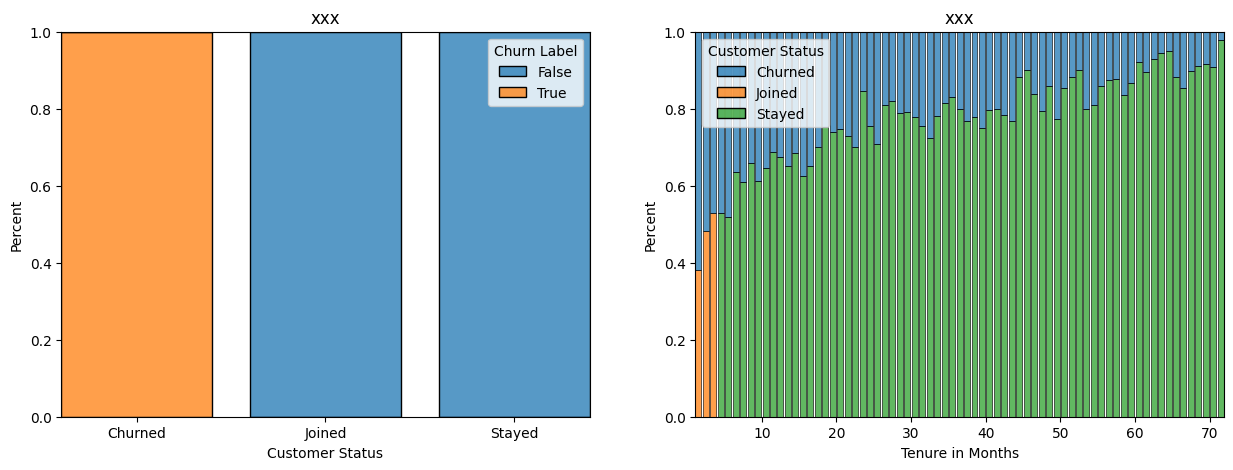

In [25]:
#Plot the relationship between Customer Status, Tenure in Months, and Churn Label
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(15,5))

chart = sns.histplot(x = 'Customer Status', data = df_s, hue = 'Churn Label', stat='percent', multiple='fill', shrink=0.8, common_norm=True, ax=axs[0]).set(title='xxx')
chart = sns.histplot(x = 'Tenure in Months', data = df_s, hue = 'Customer Status', stat='percent', multiple='fill', shrink=0.8, common_norm=True, binwidth = 1, ax=axs[1]).set(title='xxx')

The charts indicate that a customer status of Joined must occur within the first 3 months. In the charts, we can see that no user flagged as Joined has left, however, when we use tenure to indicate new customers, it is observed that plenty of recent (within the last 3 months), customers have indeed left the company. Based on this analysis, all observations should remain in the dataset for the model. In addition, the 'Customer Status' field should be removed for two reasons. First, it overlaps with the target we are looking to predict, which means it cannot be used for the prediciton. Second, the rest of the information contained in this field (essentially an encoded bucket of 'Churn Label' and 'Tenure in Months') is already availible to the model in 'Tenure in Months'.

In [26]:
#define the parameters from the function
LOD = 1
fields_to_drop = ['Customer Status']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Customer Status dropped.

#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------


### Review Missing Values in Variables

In [27]:
# Inspect observations (rows) with null values
def count_all_rows_with_null(df):
  df_null = df.isnull()
  df_null['null_count'] = df_null.sum(axis=1)
  df_null['null_flag'] = df_null['null_count'].apply(lambda x: 1 if x > 0 else 0)

  df_null = df_null[df_null['null_count'] > 0]
  print('count of observations with nulls:',df_null['null_flag'].sum())

count_all_rows_with_null(df = df_s)

count of observations with nulls: 5174


In [28]:
# Identify Columns with Nulls
def identify_columns_with_null(df):
  a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
  nc = {}

  for c in df.columns:
      string_null = np.array([x in a[2:] for x in df[c]]).sum()
      std_null = df[c].isnull().sum()
      ttl_null = std_null + string_null
      if ttl_null > 0:
          nc[c] = ttl_null

  print('number of fields with nulls:', len(nc), '\n')
  print(pd.Series(nc))

  return nc

null_columns = identify_columns_with_null(df = df_s)

number of fields with nulls: 4 

Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
        3150., 3200., 3250., 

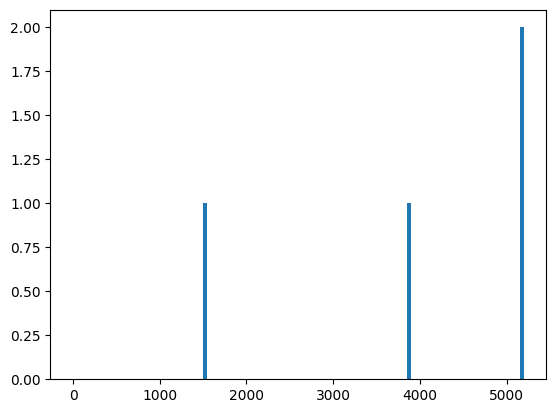

In [29]:
# Make a histogram of null counts
def histogram_of_null_cols(dict_null_columns):

  null_counts=pd.Series(dict_null_columns)
  histogram = plt.hist(null_counts, bins = range(0,5250,50)) # replace the histogram to be the plt.hist() object.
  return histogram

nc_hist = histogram_of_null_cols(dict_null_columns = null_columns)
nc_hist

In [30]:
#determine how to handle nulls
def null_col_plan(df, dict_null_columns):
  total_rows = len(df)
  print('total rows in dataset:', total_rows, '\n')
  null_counts=pd.Series(dict_null_columns)
  df_null_counts = pd.DataFrame(null_counts).reset_index().rename(columns={'index': 'feature', 0: 'nulls'})
  df_null_counts['pct'] = df_null_counts['nulls'] / total_rows

  features_to_impute = df_null_counts[df_null_counts['pct']<=0.05]['feature']
  features_to_throw = df_null_counts[df_null_counts['pct']>0.05]['feature']

  print('features to impute:', len(features_to_impute))
  print(features_to_impute, '\n')
  print('features to throw:', len(features_to_throw))
  print(features_to_throw, '\n')

  return features_to_impute, features_to_throw

features_to_impute, features_to_throw = null_col_plan(df = df_s, dict_null_columns = null_columns)

total rows in dataset: 7043 

features to impute: 0
Series([], Name: feature, dtype: object) 

features to throw: 4
0             Offer
1     Internet Type
2    Churn Category
3      Churn Reason
Name: feature, dtype: object 



In [31]:
# Drop Churn Category and Churn Reason based on significant null volumes
# Keep Offer and Internet Type as it valid to have None for these items

#define the parameters from the function
LOD = 1
fields_to_drop = ['Churn Category', 'Churn Reason']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Churn Category dropped.

 [-] field = Churn Reason dropped.

#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------


### Review Categorical Variables

In [32]:
def get_variable_lists(df):
  cat_var = list(df.select_dtypes(['object', 'boolean', 'category']).columns)
  num_var = list(df.select_dtypes(['int64', 'float64']).columns)

  return cat_var, num_var

def print_variable_lists(cat_var, num_var):
  print('There are', len(cat_var), 'categorical variables.')
  print('categorical variables =', cat_var)
  print()
  print('There are', len(num_var), 'numeric variables.')
  print('numberic variables =', num_var)
  print()

def print_value_summary(cat_var, num_var):
  #list unique values in categorical variables
  print('listing unique values for each categorical variable:')
  for c in cat_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has', len(unique_values), 'unique values. They are:', unique_values)
  print()
  print('listing range of values for each numeric variable:')
  for c in num_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has min of', min(unique_values), 'and a max of', max(unique_values))
  print()

In [33]:
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
if gDEBUG: print_value_summary(cat_var, num_var)

There are 28 categorical variables.
categorical variables = ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Zip Code', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

There are 17 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']

listing unique values for each categorical variable:
-- Customer ID has 7043 unique values. They

In [34]:
#Drop fields with too many categories
#define the parameters from the function
LOD = 1
fields_to_drop = ['Customer ID', 'City', 'Zip Code']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)

#Drop fields with only 1 category
#define the parameters from the function
LOD = 1
fields_to_drop = ['State', 'Country']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Customer ID dropped.

 [-] field = City dropped.

 [-] field = Zip Code dropped.

#### df_s ####
number of features (columns) = 42
number of observations (rows) = 7043
----------------------------

#### df_s ####
number of features (columns) = 42
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = State dropped.

 [-] field = Country dropped.

#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------


### Remove Variables Related to Target

In [35]:
if gDEBUG: quick_table_details('df_s', df_s, level_of_detail = 10)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------
Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Population', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label', 'Churn Value', 'Churn

In [36]:
# Some variable relate to the churn indicator itself and thus should be excluded from the variables

#define the parameters from the function
LOD = 1
fields_to_drop = ['Churn Value', 'Churn Score', 'CLTV']
#execute the pre-process function
df_s = pre_process_drop_fields(df_name = 'df_s', df = df_s,
                              fields_to_drop = fields_to_drop, LOD = LOD)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
Executing the drop process:

 [-] field = Churn Value dropped.

 [-] field = Churn Score dropped.

 [-] field = CLTV dropped.

#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------


### Summary of Data Clensing

#### Cleaned Data Descriptive Statistics

In [37]:
# Display a summary of table statistics
quick_table_details('df_s', df_s, level_of_detail = 2)
# Display a summary of the variables
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)
# Finally summary statistics
if gDEBUG: df_s.describe(include='all')


#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------
bool        18
int64        7
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------
There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

There are 14 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Ext

# 6.&nbsp;Exploratory Data Analysis

## Overview of Target

## Histograms of Variables

In [38]:
'''
#code has long runtime and currently does not work

fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)

for v, column in enumerate(cat_var):
  # Create a chart for each column in the data source
  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)
  # Format the Y axis and remove the label
  chart.set_ylabel('')
  # Remove the legend for the chart
  chart.legend_.remove()


fig.suptitle('Customer Churn by Variable')
plt.show()
'''

"\n#code has long runtime and currently does not work\n\nfig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)\n\nfor v, column in enumerate(cat_var):\n  # Create a chart for each column in the data source\n  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)\n  # Format the Y axis and remove the label\n  chart.set_ylabel('')\n  # Remove the legend for the chart\n  chart.legend_.remove()\n\n\nfig.suptitle('Customer Churn by Variable')\nplt.show()\n"

## Correlation Matrix

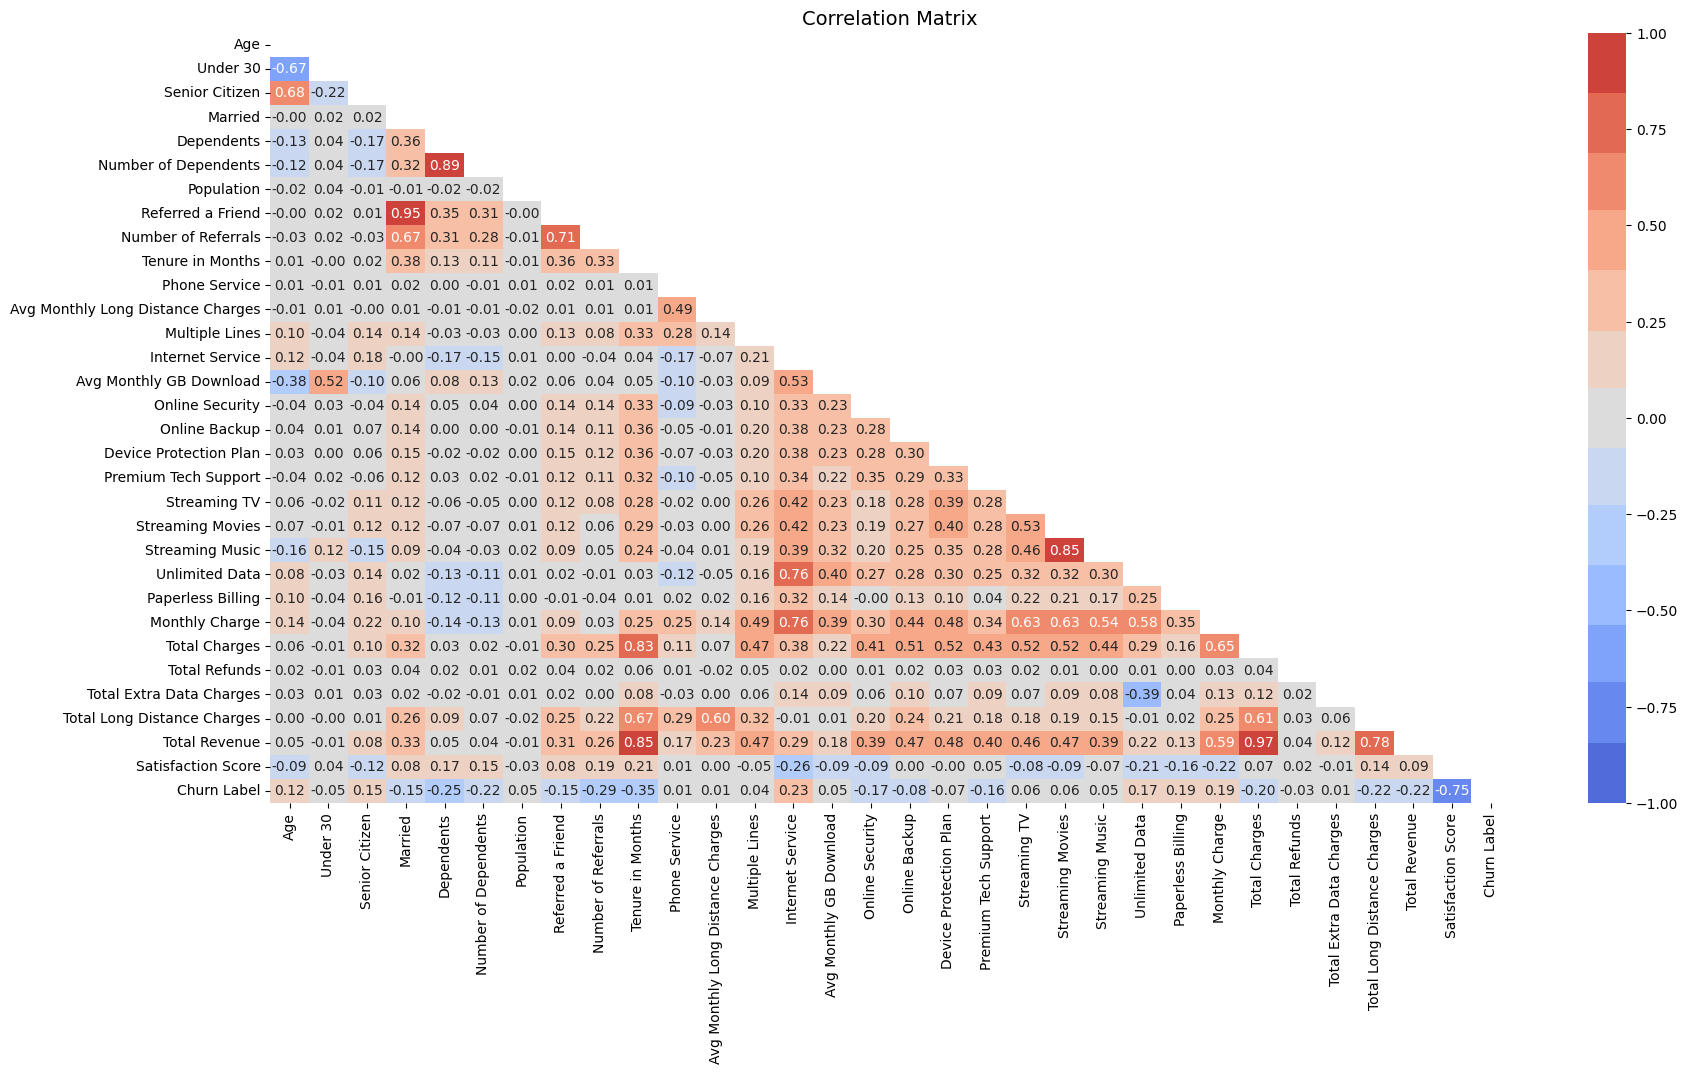

In [39]:
def print_corr_matrix(df):
  df_s = df
  # compute the correlation matrix
  cm = df_s.corr(method='pearson', min_periods=1, numeric_only=True).round(2)
  mask = np.triu(np.ones_like(cm, dtype=bool))
  # correlation matrix using a heatmap
  fig, ax = plt.subplots(figsize=(20, 10))
  heat_map = sns.heatmap(cm,
                        annot = True,
                        cmap = sns.color_palette("coolwarm", 13),
                        vmax=1, vmin=-1, center=0,
                        fmt=".2f",
                        mask=mask
      )
  #modify individual font size of elements
  plt.title('Correlation Matrix', fontsize = 14)
  plt.tick_params(axis='both', which='major', labelsize=10)

  plt.show()

print_corr_matrix(df_s)

## Pair Plot of the Data

In [40]:
def print_pair_plot(df):
  df_s = df
  #create pair plot
  #fig, ax = plt.subplots(figsize=(15, 10))
  p_plot = sns.pairplot(df_s, diag_kind = 'kde')
  #save the image
  plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

  #modify individual font size of elements
  #plt.title('Pair Plot', fontsize = 28)
  #plt.tick_params(axis='both', which='major', labelsize=14)

  #plt.show()

#commented out to save time on file refresh
#print_pair_plot(df_s)

## Feature Importance

## Summary of Exploratory Data Analsis

### Summary

### Conclusions

# 7.&nbsp;Model: Random Forest Classifier

## 7.1.&nbsp;Model Pre-Processing

In [41]:
###

### 7.1.1.&nbsp;Model Overview

### 7.1.2.&nbsp;Review of Colinearity

### 7.1.3.&nbsp;Feature Engineering

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

class data_churn:
    """
    Class to structure dataset for training and testing through pre-processing and feature engineering

    Reference the following attributes:
    -- Feature Lists: feature_names, feature_names_dummy, dummy_names
    -- Input Data: y, X, X_dummies
    -- Training Data: y_train, x_train, x_train_dummies
    -- Testing Dats: y_test, x_test, x_test_dummies
    """

    def __init__(self, df, test_size = 0.2):
        # Create the full dataset
        self.y = df.copy()['Churn Label']
        self.X = df.copy().drop(['Churn Label'], axis=1)

        # Create the full dataset with dummy variables
        self.X_dummies = pd.get_dummies(self.X)

        # Split the data to train and test datasets such that the test dataset is 20% of original data
        from sklearn.model_selection import train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, stratify = self.y, shuffle = True, random_state = 27)

        # Create the test and train dataset with dummy variables
        self.x_train_dummies = pd.get_dummies(self.x_train)
        self.x_test_dummies = pd.get_dummies(self.x_test)

        # Create the list of feature names and dummy feature names
        self.feature_names = set(self.X.columns)
        self.feature_names_dummy = set(self.X_dummies.columns)
        self.dummy_names = self.feature_names_dummy - self.feature_names

    def describe(self, LOD = 10):
      # LOD = 1: Summerize the feature datasets and the split executed
      if LOD >= 1:
          print()
          print('Length of all:\t\t', len(self.X))
          print('Length of train:\t', len(self.x_train))
          print('Length of test:\t\t', len(self.x_test))
          print('Percent for testing:\t', round(len(self.x_test)/len(self.X),2))
          print()

      # LOD = 2: Summerize the features and dummy features created
      if LOD >= 1:
          y_df = pd.DataFrame(self.y)
          print('Number of targets:\t', len(y_df.columns))
          print('List of targets:\t', y_df.columns)
          print()
          print('Number of feature:\t', len(self.feature_names))
          print('List of features:\t', self.feature_names)
          print()
          print('Number of dummies:\t', len(self.dummy_names))
          print('List of dummies:\t', self.dummy_names)
          print()
          print('Number of feature with dummies:\t', len(self.feature_names_dummy))
          print('List of features with dummies:\t', self.feature_names_dummy)
          print()

      # LOD = 3: Summarize the stratification of targets across test and train
      if LOD >= 3:
          print('All Records:', self.y.value_counts(), '\n')
          print('Train Records:', self.y_train.value_counts(), '\n')
          print('Test Records:', self.y_test.value_counts(), '\n')

      # LOD = 4: Display a sample of train and train with dummy features
      if LOD >= 4:
          print('Displaying a sample of x_train:')
          print(self.x_train.head())
          print()
          print('Displaying a sample of x_train_dummies:')
          print(self.x_train_dummies.head())
          print()

In [43]:
# Create test/train dataset with a test size split
dc = data_churn(df = df_s, test_size = 0.2)
# describe the data source created
dc.describe(LOD = 10)


Length of all:		 7043
Length of train:	 5634
Length of test:		 1409
Percent for testing:	 0.2

Number of targets:	 1
List of targets:	 Index(['Churn Label'], dtype='object')

Number of feature:	 36
List of features:	 {'Under 30', 'Streaming TV', 'Payment Method', 'Phone Service', 'Senior Citizen', 'Streaming Movies', 'Dependents', 'Total Long Distance Charges', 'Avg Monthly Long Distance Charges', 'Total Extra Data Charges', 'Gender', 'Paperless Billing', 'Satisfaction Score', 'Online Security', 'Device Protection Plan', 'Age', 'Multiple Lines', 'Referred a Friend', 'Total Refunds', 'Premium Tech Support', 'Contract', 'Avg Monthly GB Download', 'Monthly Charge', 'Offer', 'Total Revenue', 'Streaming Music', 'Tenure in Months', 'Population', 'Online Backup', 'Number of Dependents', 'Internet Service', 'Internet Type', 'Married', 'Unlimited Data', 'Total Charges', 'Number of Referrals'}

Number of dummies:	 18
List of dummies:	 {'Payment Method_Mailed Check', 'Internet Type_Fiber Optic',

## 7.2.&nbsp;Baseline Model

#### Baseline - Model Functions

In [82]:
# create a model tracker to capture key model details
model_tracker = {'Model': [],
                 'Mean Accuracy' : [],
                 'Mean ROC AUC' : [],
                 'F1 Score' : [],
                 'Fit Time' : [],
                 'Score Time' : []}

# function to add new model stats to the model tracker
def add_model_to_tracker(model_tracker, model_name, score_k):
  m = model_tracker
  k = score_k
  m['Model'].append(model_name)
  m['Mean Accuracy'].append(k[(k['Metric'] == 'Accuracy') & (k['Group'] == 'test_')]['Mean'].iloc[0])
  m['Mean ROC AUC'].append(k[(k['Metric'] == 'ROC AUC') & (k['Group'] == 'test_')]['Mean'].iloc[0])
  m['Mean ROC AUC'].append(k[(k['Metric'] == 'F1') & (k['Group'] == 'test_')]['Mean'].iloc[0])
  m['Fit Time'].append(k[(k['Metric'] == 'fit_time')]['Mean'].iloc[0])
  m['Score Time'].append(k[(k['Metric'] == 'score_time')]['Mean'].iloc[0])
  return m


#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

def create_template_clf():
  random_state = 27
  bootstrap = True     # True, False
  verbose = 0
  criterion = 'gini'   #'gini', 'entropy', 'log_loss'
  #n_estimators = 100   # 10 - 1000
  #max_depth = 5        # 2,4,6,8,10,12,14,16,18,20
  #min_samples_leaf = 1 #2,4,6,8,10

  # Create the classifier
  clf = RandomForestClassifier(random_state = random_state,
                              bootstrap = bootstrap,
                              verbose = verbose,
                              criterion = criterion
                              )

  return clf

def create_baseline_clf():
  # Create the classifier
  clf = create_template_clf()

  clf.fit(dc.x_train_dummies, dc.y_train)

  clf_score = clf.score(dc.x_test_dummies, np.array(dc.y_test))

  print('Baselin CLF Params:', clf.get_params(), '\n')

  print('Baseline CLF Score:', clf_score, '\n')

  return clf

# https://scikit-learn.org/stable/modules/model_evaluation.html

def build_rskf(n_splits = 5, n_repeats = 3, random_state = 27):

  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
  from sklearn.model_selection import RepeatedStratifiedKFold

  rskf = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats, random_state = random_state)

  return rskf

def score_holdout(clf, X, y):
    """
    Computes prediction accuracy of classifier.

    Args:
        clf        : classsifier model created and fitted
        X (ndarray): [n_samples x n_features] ndarray of data
        y (ndarray): [n_samples] ndarray of true labels

    Returns:
        Prediction accuracy (between 0.0 and 1.0).
    """

    # Predict the outcomes based on X
    ypred = clf.predict(X)
    ytrue = y

    # https://scikit-learn.org/stable/modules/model_evaluation.html
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import f1_score

    # generate the metrics for the holdout data set
    dict_scores = {}
    dict_scores['Accuracy'] = accuracy_score(ytrue, ypred)
    dict_scores['Precision'] = precision_score(ytrue, ypred)
    dict_scores['Recall'] = recall_score(ytrue, ypred)
    dict_scores['ROC AUC'] = roc_auc_score(ytrue, ypred)
    dict_scores['F1'] = f1_score(ytrue, ypred)

    metric = []
    score = []
    for key, value in dict_scores.items():
      metric.append(key)
      score.append(round(value,3))

    df_scores = pd.DataFrame({'Metric' : metric, 'Score' : score})

    return df_scores

def score_kfold(clf, X, y):

  # build the repeated stratified k-fold
  rskf = build_rskf()

  # https://scikit-learn.org/stable/modules/model_evaluation.html
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import f1_score

  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
  from sklearn.metrics import make_scorer
  dict_score_metrics = {'Accuracy' : make_scorer(accuracy_score),
                        'Precision' : make_scorer(precision_score),
                        'Recall' : make_scorer(recall_score),
                        'ROC AUC' : make_scorer(roc_auc_score),
                        'F1' : make_scorer(f1_score)
  }

  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
  from sklearn.model_selection import cross_validate
  dict_scores = cross_validate(clf, X, y, cv = rskf, scoring = dict_score_metrics, return_train_score=True)

  group = []; metric = []; min = []; mean = []; max = []; std = []; itr = []
  for key in dict_scores.keys():
      if 'test_' in key:
        g = 'test_'
      elif 'train_' in key:
        g = 'train_'
      else:
        g = 'other_'
      group.append(g)
      metric.append(key.replace(g, ''))
      min.append(round(np.min(dict_scores[key]),3))
      mean.append(round(np.mean(dict_scores[key]),3))
      max.append(round(np.max(dict_scores[key]),3))
      std.append(round(np.std(dict_scores[key]),3))
      itr.append(dict_scores[key].size)

  df_scores = pd.DataFrame({'Group' : group,
                            'Metric' : metric,
                            'Min' : min,
                            'Mean' : mean,
                            'Max' : max,
                            'Std Dev' : std,
                            'Iterations' : itr
                            })

  return df_scores, dict_scores

#### Baseline - Model Creation

In [45]:
# Create the baseline model
clf_baseline = create_baseline_clf()

Baselin CLF Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False} 

Baseline CLF Score: 0.9652235628105039 



#### Baseline - Model Evaluation

In [46]:
# Assess the model against the holdout data
score_h_baseline = score_holdout(clf = clf_baseline, X = dc.x_test_dummies, y = dc.y_test)
# Assess the model in a k-fold framework
score_k_baseline, dict_scores_baseline = score_kfold(clf = clf_baseline, X = dc.X_dummies, y = dc.y)

In [47]:
# Assess the model against the holdout data
print('Results of model fit for holdout data vs. the training data set.')
print(score_h_baseline)
print()
print('Results of model fit on average across a stratified k-fold.')
print(score_k_baseline)

Results of model fit for holdout data vs. the training data set.
      Metric  Score
0   Accuracy  0.965
1  Precision  0.977
2     Recall  0.890
3    ROC AUC  0.941
4         F1  0.931

Results of model fit on average across a stratified k-fold.
     Group      Metric    Min   Mean    Max  Std Dev  Iterations
0   other_    fit_time  0.810  0.909  1.251    0.164          15
1   other_  score_time  0.034  0.040  0.051    0.006          15
2    test_    Accuracy  0.957  0.963  0.970    0.004          15
3   train_    Accuracy  1.000  1.000  1.000    0.000          15
4    test_   Precision  0.951  0.975  0.988    0.009          15
5   train_   Precision  1.000  1.000  1.000    0.000          15
6    test_      Recall  0.861  0.884  0.904    0.014          15
7   train_      Recall  0.999  1.000  1.000    0.000          15
8    test_     ROC AUC  0.927  0.938  0.948    0.007          15
9   train_     ROC AUC  1.000  1.000  1.000    0.000          15
10   test_          F1  0.915  0.927  0

In [48]:
# Register baseline model in the tracker
model_tracker = add_model_to_tracker(model_tracker = model_tracker, model_name = 'Baseline', score_k = score_k_baseline)
print(model_tracker)

{'Model': ['Baseline'], 'Mean Accuracy': [0.963], 'Mean ROC AUC': [0.938], 'Fit Time': [0.909], 'Score Time': [0.04]}


## 7.3.&nbsp;Course Grain - Hyper Parameter Tuning

### Course Grain - Tuning Functions

In [49]:
# Run the grid analysis on a single parameter to optimize
def tune_single_param(clf, data, cv = 3, param = 'n_estimators', param_max = 100, param_step_size = 10):
  from sklearn.model_selection import cross_val_score, GridSearchCV

  # Create list of parameters to use in experiment
  parameters = {param: list(range(param_step_size, param_max+1, param_step_size))}

  grid = GridSearchCV(clf,
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = cv,
                      n_jobs = -1,
                      verbose = 2,
                      return_train_score = True)

  grid.fit(data.x_train_dummies,data.y_train)

  return grid

# Print a brief summary of the best parameter summary
def print_grid_summary(grid):
  print()
  print('Best Parameters: ', grid.best_params_)
  print('Best Estimator: ', grid.best_estimator_)
  print('Best Score: ', grid.best_score_)
  print('All Parameters:', grid.best_estimator_.get_params())
  print()

# Return a table of results
def results_table_single_params(grid, param_label, single = True):
  #unpack list of parameter dictionaries
  params = []
  if single:
    for list_item in grid.cv_results_['params']:
      for key, value in list_item.items():
        params.append(value)
  else:
    for list_item in grid.cv_results_['params']:
        params.append(list_item)

  #print(params)
  # Create and calculate thecore rows of the table
  results_table = pd.DataFrame({'param_label' : param_label,
                                'x_parameter' : params,
                                'y_train_score' : grid.cv_results_['mean_train_score'],
                                'y_test_score' : grid.cv_results_['mean_test_score'],
                                'y_model_time' : grid.cv_results_['mean_fit_time'],
                                'y_score_time' : grid.cv_results_['mean_score_time'],
                                })
  # Add custom selection score to the table
  results_table['n_model_time'] = 1 - (results_table['y_model_time'] - results_table['y_model_time'].min()) / (results_table['y_model_time'].max() - results_table['y_model_time'].min())
  results_table['n_score_time'] = 1 - (results_table['y_score_time'] - results_table['y_score_time'].min()) / (results_table['y_score_time'].max() - results_table['y_score_time'].min())
  results_table['n_test_score'] = (results_table['y_test_score'] - results_table['y_test_score'].min()) / (results_table['y_test_score'].max() - results_table['y_test_score'].min())
  results_table['weighted_selection'] = (0.5 * results_table['n_test_score'] #half the score is based on accuracy score
                                         + 0.25 * (results_table['n_score_time'] + results_table['n_test_score']) #half the score is based on time performance
                                        )
  results_table = results_table.drop(columns = ['n_model_time', 'n_score_time', 'n_test_score'])
  # Add additional rows to support charts
  results_table['weighted_selection_rank'] = results_table['weighted_selection'].rank(method='first', ascending = False)
  results_table['y_test_score_rank'] = results_table['y_test_score'].rank(method='first', ascending = False)
  results_table['row_number'] = results_table.reset_index().index
  # Determine the ideal axis markings for the charts
  if single:
    results_table['x_axis_ticks'] = results_table['x_parameter']
  else:
    results_table['x_axis_ticks'] = results_table['row_number']

  return results_table

def results_plot_single_params(grid, param_label, score_label, single = True):
  results_table = results_table_single_params(grid, param_label = param_label, single = single)

  fig = plt.figure()
  ax = fig.add_subplot(111)

  x = list(results_table['x_axis_ticks'])
  y = list(results_table['weighted_selection'])
  line = ax.plot(x, y)

  print(x)
  print(y)

  ymax = max(y)
  xpos = y.index(ymax)
  xmax = x[xpos]

  ax.annotate('parameter = ' + str(xmax), xy=(xmax, ymax),
              xytext=(xmax+10, ymax+0.05),
              arrowprops=dict(facecolor = 'black',
                              shrink = 0.1,
                              linewidth = 1,
                              width = 1,
                              headwidth = 4,
                              headlength = 4)
              )

  plt.show()
  print('max value of', round(ymax, 3), 'for the weighted selection score occurs at parameter =', xmax)
  print('The parameters set used is:', results_table['x_parameter'][xpos], '\n')
  return xmax, ymax, xpos

# Chart the performance of the single parameter
def chart_single_param(grid, param_label, score_label, single = True):
  # build the results table
  results_table = results_table_single_params(grid, param_label, single = single)

  #create arrays to plot
  x_parameter = results_table['x_axis_ticks']
  y_train_score = results_table['y_train_score']
  y_test_score = results_table['y_test_score']
  y_model_time = results_table['y_model_time']
  y_score_time = results_table['y_score_time']

  #Create a subplot to map 2 charts
  fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(10,3))
  #Create subplot 1 based on Time
  plt.subplot(121)
  plt.plot(x_parameter, y_model_time, label = 'Model Training Time')
  plt.plot(x_parameter, y_score_time, label = 'Model Scoring Time')
  plt.legend()
  plt.xlabel(param_label)
  plt.ylabel('Total Time (seconds)')
  plt.title('Time Taken to Complete Task')

  #Create subplot 2 based on metric
  plt.subplot(122)
  plt.plot(x_parameter, y_train_score, label = 'Training Mean Error')
  plt.plot(x_parameter, y_test_score, label = 'Testing Mean Error')
  plt.legend()
  plt.xlabel(param_label)
  plt.ylabel(score_label)
  plt.title(score_label + ' vs. Parameter')

def support_table_weighted_selection_score (results_table):
  print('Records Around the Best Weighted Selection Score:', '\n', results_table.head(target_index + 4).tail(7).drop(columns = ['x_axis_ticks','y_train_score']), '\n')
  print('')
  print('Top 5 Records with the Best Weighted Selection Score', '\n',results_table.sort_values(by='weighted_selection_rank', ascending=True).head(5).drop(columns = ['x_axis_ticks','y_train_score']), '\n')



def suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005):
  # determine the threshold of records to consider
  max_y_test_score = round(results_table['y_test_score'].max(),4)
  cutoff_y_test_score = max_y_test_score - cutoff_margin
  print()
  print('Max Test Score:', max_y_test_score)
  print('Cutoff for Candidates to Consider:', cutoff_y_test_score)
  print()
  # Create a candidates result table - working copy
  candidate_results_table = results_table[results_table['y_test_score'] > cutoff_y_test_score].copy(deep=True)
  #print('Potential Cadidate Parameters: ', '\n', candidate_results_table)

  # Identify the best candidate based on x_param
  candidate_results_table ['x_parameter_rank'] = candidate_results_table['x_parameter'].rank(method='first', ascending = best_param_smallest)
  # Print(candidate_results_table)

  # Select top candidate record for each type
  candidate_results_table = candidate_results_table[(candidate_results_table['weighted_selection_rank'] == 1)
                                                    | (candidate_results_table['y_test_score_rank'] == 1)
                                                    | (candidate_results_table['x_parameter_rank'] == 1)
                                                    ]
  conditions = [
    (candidate_results_table['weighted_selection_rank'] == 1),
    (candidate_results_table['y_test_score_rank'] == 1),
    (candidate_results_table['x_parameter_rank'] == 1)
  ]
  choices = ['Best Weighted Score', 'Best Test Score', 'Best Parameter']
  candidate_results_table['candidate_type'] = np.select(conditions, choices, default='xxxx')

  # Print the 3 candidate parameter sets
  print('Top parameter suggestions for tuning the model:','\n', candidate_results_table.drop(columns = ['x_axis_ticks', 'y_train_score', 'x_parameter_rank',
                                                'y_test_score_rank','weighted_selection_rank', 'row_number']), '\n')

  return list(candidate_results_table['x_parameter'])

### Course Grain - Tuning

####Tuning: Number of Trees

In [50]:
# Create the classifier
clf_tree = create_template_clf()

# Run the course grain test on the model
grid_tree_size = tune_single_param(clf = clf_tree, data = dc, cv = 3,
                                param = 'n_estimators', param_max = 50, param_step_size = 5)

Fitting 3 folds for each of 10 candidates, totalling 30 fits



Best Parameters:  {'n_estimators': 50}
Best Estimator:  RandomForestClassifier(n_estimators=50, random_state=27)
Best Score:  0.9613063542776003
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


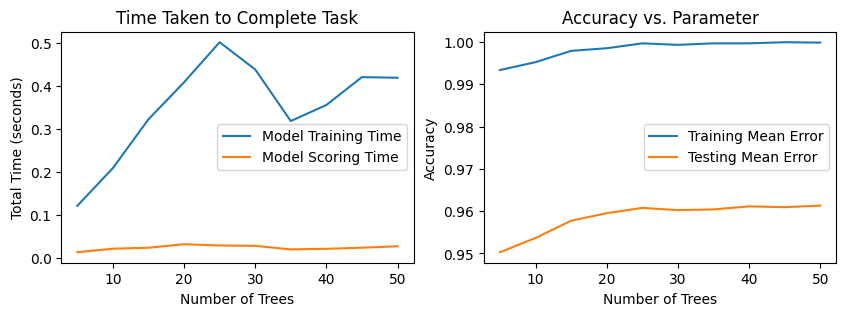

In [51]:
# Display the best paramenter
print_grid_summary(grid_tree_size)
# Chart the results
chart_single_param(grid_tree_size, param_label = 'Number of Trees', score_label = 'Accuracy', single = True)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[0.25, 0.36952212351086744, 0.6173568151180279, 0.6290322580645147, 0.753336519743421, 0.7285222849857488, 0.8511735028285057, 0.8807741441934822, 0.8347044643243436, 0.8144336634766621]


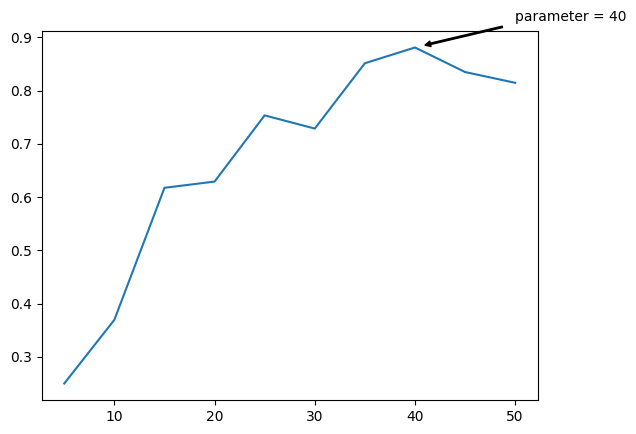

max value of 0.881 for the weighted selection score occurs at parameter = 40
The parameters set used is: 40 

Records Around the Best Weighted Selection Score: 
        param_label  x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
3  Number of Trees           20      0.959531      0.407848      0.032009            0.629032                      7.0                7.0           3
4  Number of Trees           25      0.960774      0.500946      0.029070            0.753337                      5.0                4.0           4
5  Number of Trees           30      0.960241      0.437689      0.028218            0.728522                      6.0                6.0           5
6  Number of Trees           35      0.960419      0.317969      0.020018            0.851174                      2.0                5.0           6
7  Number of Trees           40      0.961129      0.355266      0.021411            0.8

In [52]:
# create a results table
results_table = results_table_single_params(grid_tree_size, param_label = 'Number of Trees')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(grid_tree_size, param_label = 'Number of Trees', score_label = 'Weighted Selection Score', single = True)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

####Tuning: Max Depth

In [53]:
# Create the classifier
clf_max_depth = create_template_clf()
# Run the course grain test on the model
grid_max_depth = tune_single_param(clf = clf_max_depth, data = dc, cv = 3,
                                param = 'max_depth', param_max = 30, param_step_size = 2)

Fitting 3 folds for each of 15 candidates, totalling 45 fits



Best Parameters:  {'max_depth': 14}
Best Estimator:  RandomForestClassifier(max_depth=14, random_state=27)
Best Score:  0.9621938232161874
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


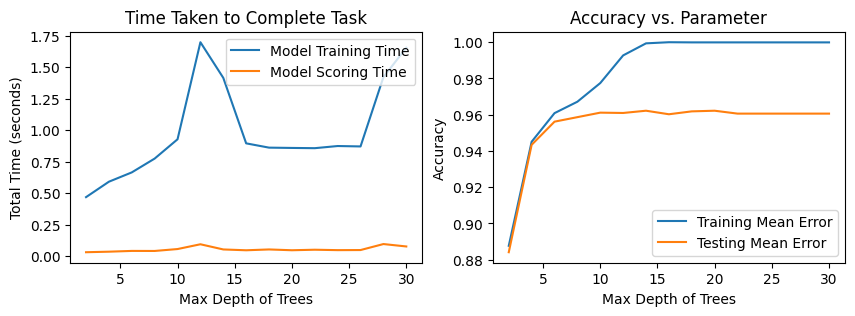

In [54]:
# Display the best paramenter
print_grid_summary(grid_max_depth)
# Chart the results
chart_single_param(grid_max_depth, param_label = 'Max Depth of Trees', score_label = 'Accuracy', single = True)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[0.25, 0.8028522800049924, 0.9020265719956492, 0.9273771173152712, 0.8925872925516117, 0.7445004330173228, 0.9152370053892414, 0.9216462886360608, 0.911684948352407, 0.9395660442282707, 0.9082046631225988, 0.9209852838956079, 0.9181241245168461, 0.7346590909090913, 0.8084338987466964]


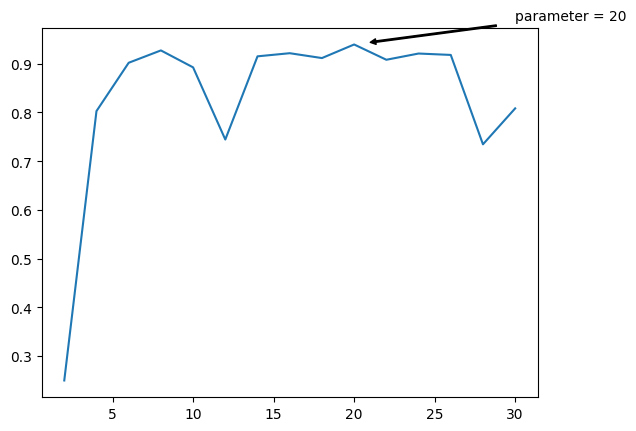

max value of 0.94 for the weighted selection score occurs at parameter = 20
The parameters set used is: 20 

Records Around the Best Weighted Selection Score: 
    param_label  x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
6    Max Depth           14      0.962194      1.415709      0.052229            0.915237                      6.0                1.0           6
7    Max Depth           16      0.960241      0.895351      0.045698            0.921646                      3.0               11.0           7
8    Max Depth           18      0.961839      0.861291      0.052266            0.911685                      7.0                3.0           8
9    Max Depth           20      0.962194      0.858902      0.045913            0.939566                      1.0                2.0           9
10   Max Depth           22      0.960596      0.857002      0.050072            0.908205                    

In [55]:
# create a results table
results_table = results_table_single_params(grid_max_depth, param_label = 'Max Depth')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(grid_max_depth, param_label = 'Number of Trees', score_label = 'Weighted Selection Score', single = True)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

####Tuning: Min Sample Leafs

In [56]:
# Create the classifier
clf_min_samples_leaf = create_template_clf()
# Run the course grain test on the model
grid_min_samples_leaf = tune_single_param(clf = clf_min_samples_leaf, data = dc, cv = 3,
                                param = 'min_samples_leaf', param_max = 20, param_step_size = 2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits



Best Parameters:  {'min_samples_leaf': 2}
Best Estimator:  RandomForestClassifier(min_samples_leaf=2, random_state=27)
Best Score:  0.9621938232161874
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


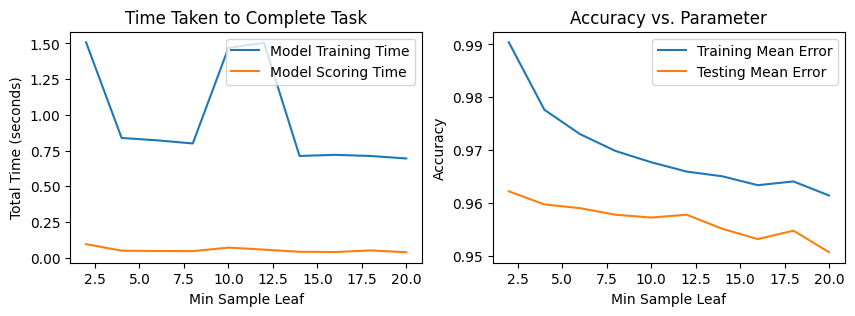

In [57]:
# Display the best paramenter
print_grid_summary(grid_min_samples_leaf)
# Chart the results
chart_single_param(grid_min_samples_leaf, param_label = 'Min Sample Leaf', score_label = 'Accuracy', single = True)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[0.75, 0.7911374104099148, 0.7537871486251203, 0.6778897975471295, 0.5358130746944086, 0.6315051436703005, 0.5250541451747315, 0.4056128709767998, 0.4597106959726557, 0.25]


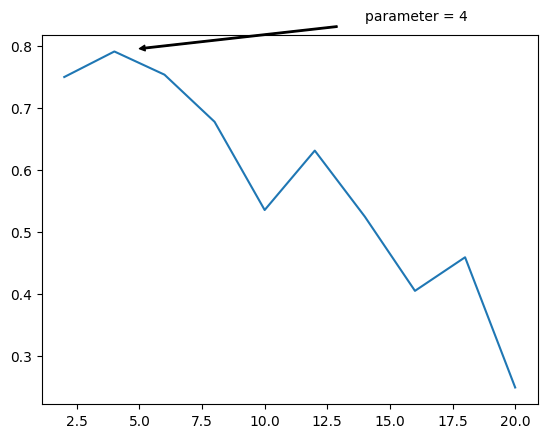

max value of 0.791 for the weighted selection score occurs at parameter = 4
The parameters set used is: 4 

Records Around the Best Weighted Selection Score: 
        param_label  x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
0  Min Sample Leaf            2      0.962194      1.508879      0.094604            0.750000                      3.0                1.0           0
1  Min Sample Leaf            4      0.959709      0.838201      0.048639            0.791137                      1.0                2.0           1
2  Min Sample Leaf            6      0.958999      0.821677      0.046642            0.753787                      2.0                3.0           2
3  Min Sample Leaf            8      0.957756      0.799748      0.045537            0.677890                      4.0                4.0           3
4  Min Sample Leaf           10      0.957224      1.468647      0.069909            0.535

In [58]:
# create a results table
results_table = results_table_single_params(grid_min_samples_leaf, param_label = 'Min Sample Leaf')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(grid_min_samples_leaf, param_label = 'Number of Trees', score_label = 'Weighted Selection Score', single = True)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = False, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

#### Tuning: Max Features
max_features

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Parameters:  {'max_features': 16}
Best Estimator:  RandomForestClassifier(max_features=16, random_state=27)
Best Score:  0.9621938232161874
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 16, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[0.0, 0.7800950875380723, 0.7954952224473548, 0.8971622692910948, 0.9246390178037412, 0.7726070801639324, 0.8786148406893399, 0.9410220747863909, 0.9401953490461

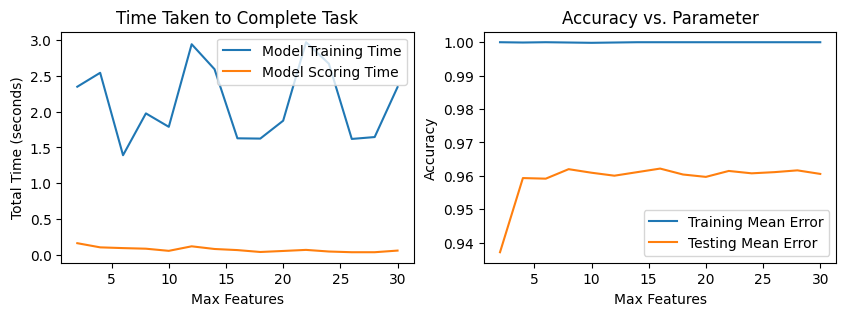

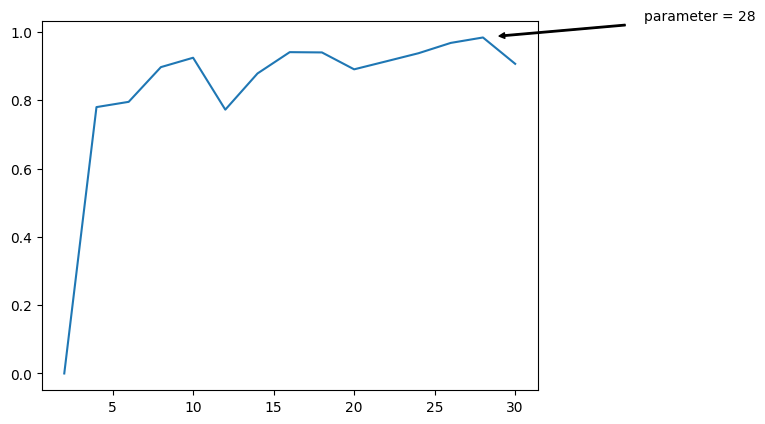

max value of 0.984 for the weighted selection score occurs at parameter = 28
The parameters set used is: 28 

Records Around the Best Weighted Selection Score: 
      param_label  x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
8   Max Features           18      0.960419      1.622858      0.041126            0.940195                      4.0               10.0           8
9   Max Features           20      0.959709      1.872500      0.055349            0.890689                     10.0               12.0           9
10  Max Features           22      0.961484      2.967212      0.070304            0.914202                      7.0                4.0          10
11  Max Features           24      0.960774      2.667088      0.047635            0.937914                      5.0                8.0          11
12  Max Features           26      0.961129      1.617986      0.037793            0.968085       

In [84]:
# Create the classifier
clf_max_features = create_template_clf()
# Run the course grain test on the model
grid_max_features = tune_single_param(clf = clf_max_features, data = dc, cv = 3,
                                param = 'max_features', param_max = 30, param_step_size = 2)


Best Parameters:  {'max_features': 16}
Best Estimator:  RandomForestClassifier(max_features=16, random_state=27)
Best Score:  0.9621938232161874
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 16, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[0.0, 0.7800950875380723, 0.7954952224473548, 0.8971622692910948, 0.9246390178037412, 0.7726070801639324, 0.8786148406893399, 0.9410220747863909, 0.9401953490461167, 0.8906894743202753, 0.9142020193651517, 0.93791441745714

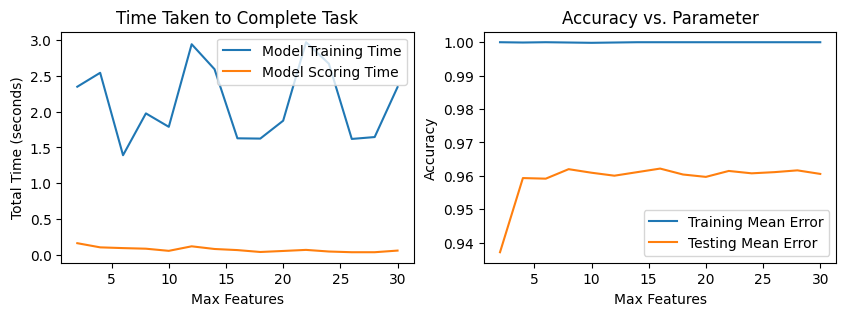

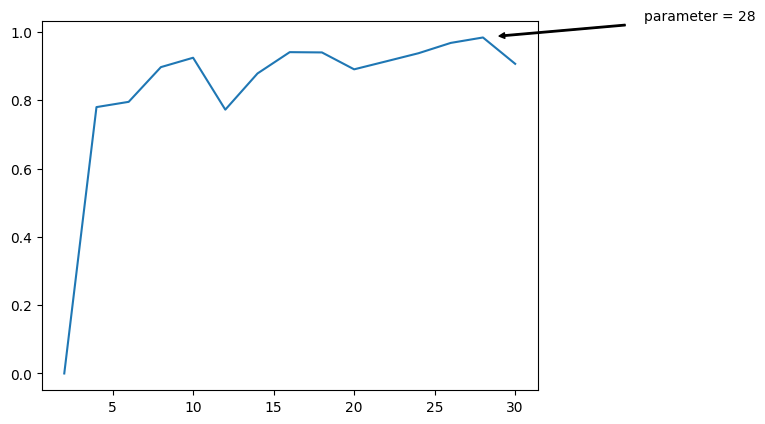

max value of 0.984 for the weighted selection score occurs at parameter = 28
The parameters set used is: 28 

Records Around the Best Weighted Selection Score: 
      param_label  x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
8   Max Features           18      0.960419      1.622858      0.041126            0.940195                      4.0               10.0           8
9   Max Features           20      0.959709      1.872500      0.055349            0.890689                     10.0               12.0           9
10  Max Features           22      0.961484      2.967212      0.070304            0.914202                      7.0                4.0          10
11  Max Features           24      0.960774      2.667088      0.047635            0.937914                      5.0                8.0          11
12  Max Features           26      0.961129      1.617986      0.037793            0.968085       

In [85]:
# Display the best paramenter
print_grid_summary(grid_max_features)
# Chart the results
chart_single_param(grid_max_features, param_label = 'Max Features', score_label = 'Accuracy', single = True)

# create a results table
results_table = results_table_single_params(grid_max_features, param_label = 'Max Features')
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(grid_max_features, param_label = 'Max Features', score_label = 'Weighted Selection Score', single = True)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

### Course Grain - Model Evaluation

In [59]:
# Create the course grain model model
# Create the classifier
clf_course = create_template_clf()

param_set = {'n_estimators' : 25, 'max_depth' : 20, 'min_samples_leaf' : 4}
print('Params to Set:', param_set, '\n')
clf_course = clf_course.set_params(**param_set)
print('All Params:', clf_course.get_params(), '\n')

clf_course.fit(dc.x_train_dummies, dc.y_train)

Params to Set: {'n_estimators': 25, 'max_depth': 20, 'min_samples_leaf': 4} 

All Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False} 



RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=25,
                       random_state=27)

In [60]:
# Assess the model against the holdout data
score_h_course = score_holdout(clf = clf_course, X = dc.x_test_dummies, y = dc.y_test)
# Assess the model in a k-fold framework
score_k_course, dict_scores_course = score_kfold(clf = clf_course, X = dc.X_dummies, y = dc.y)

In [61]:
# Assess the model against the holdout data
print('Results of model fit for holdout data vs. the training data set.')
print(score_h_course)
print()
print('Results of model fit on average across a stratified k-fold.')
print(score_k_course)

Results of model fit for holdout data vs. the training data set.
      Metric  Score
0   Accuracy  0.959
1  Precision  0.976
2     Recall  0.866
3    ROC AUC  0.929
4         F1  0.918

Results of model fit on average across a stratified k-fold.
     Group      Metric    Min   Mean    Max  Std Dev  Iterations
0   other_    fit_time  0.186  0.226  0.310    0.043          15
1   other_  score_time  0.017  0.022  0.028    0.004          15
2    test_    Accuracy  0.952  0.961  0.969    0.004          15
3   train_    Accuracy  0.977  0.978  0.980    0.001          15
4    test_   Precision  0.954  0.971  0.985    0.010          15
5   train_   Precision  0.989  0.993  0.996    0.002          15
6    test_      Recall  0.853  0.878  0.896    0.013          15
7   train_      Recall  0.918  0.925  0.932    0.004          15
8    test_     ROC AUC  0.922  0.934  0.945    0.007          15
9   train_     ROC AUC  0.958  0.961  0.965    0.002          15
10   test_          F1  0.905  0.922  0

In [62]:
# Course Tuned baseline model in the tracker
model_tracker = add_model_to_tracker(model_tracker = model_tracker, model_name = 'Course Tuned', score_k = score_k_course)
#print(model_tracker)
df_mt = pd.DataFrame(model_tracker)
df_mt

,Model,Mean Accuracy,Mean ROC AUC,Fit Time,Score Time
0,Baseline,0.963,0.938,0.909,0.040
1,Course Tuned,0.961,0.934,0.226,0.022


## 7.4.&nbsp;Fine Grain - Hyper Parameter Tuning

### Fine Grain - Tuning Functions

In [63]:
#Grid Search
# Run the grid analysis on multiple parameter to optimize
def tune_multi_param(clf, data, param, cv = 3):
  from sklearn.model_selection import cross_val_score, GridSearchCV

  # Create list of parameters to use in experiment
  parameters = param

  grid = GridSearchCV(clf,
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = cv,
                      n_jobs = -1,
                      verbose = 2,
                      return_train_score = True)

  grid.fit(data.x_train_dummies,data.y_train)

  return grid

In [64]:
#Tuning Parameter Functions

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


def plotSearchGrid(grid, param_1, param_2, target_score = 'y_test_score'):

    results_table = results_table_single_params(grid, param_label = 'All', single = False)
    target_score = list(results_table[target_score])

    scores = [x for x in target_score]
    scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel(param_2)
    plt.ylabel(param_1)
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid[param_2])), grid.param_grid[param_2], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid[param_1])), grid.param_grid[param_1])
    plt.title('Validation Accuracy')
    plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

###Fine Grain - Tuning

####Tuning - 3 Pararameters

In [65]:
# Create the classifier
clf_fine = create_template_clf()

set_n_estimators =     list(range(10, 31, 5)) #centered around 25
set_max_depth =        list(range(10, 31, 5)) # centered around 20
set_min_samples_leaf = list(range(1, 8, 2)) # centered around 4
set_max_features =     list(range(1, 11, 2)) # centered around 4

print('set_n_estimators =', set_n_estimators)
print('set_max_depth =', set_max_depth)
print('set_min_samples_leaf =', set_min_samples_leaf)
print('set_max_features =', set_max_features)
print()
# Create list of parameters to use in experiment
parameters = {'n_estimators'     : set_n_estimators,
              'max_depth'        : set_max_depth,
              'min_samples_leaf' : set_min_samples_leaf,
              'max_features'     : set_max_features
              }

# Run the course grain test on the model
grid_fine = tune_multi_param(clf = clf_fine, data = dc, param = parameters, cv = 3)

set_n_estimators = [10, 15, 20, 25, 30]
set_max_depth = [10, 15, 20, 25, 30]
set_min_samples_leaf = [1, 3, 5, 7]

Fitting 3 folds for each of 100 candidates, totalling 300 fits



Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 30}
Best Estimator:  RandomForestClassifier(max_depth=10, n_estimators=30, random_state=27)
Best Score:  0.9613063542776003
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 15}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 25}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 30}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 10}, {'max_depth': 10, 'min

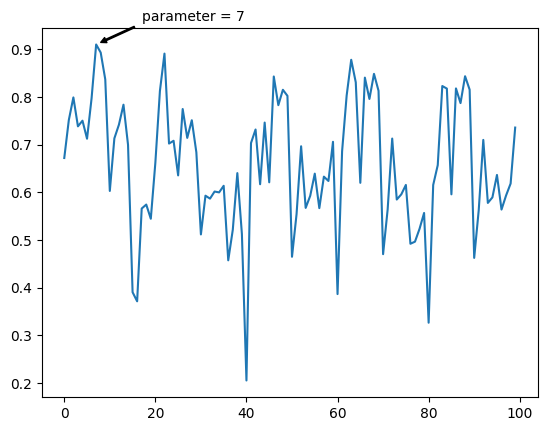

max value of 0.91 for the weighted selection score occurs at parameter = 7
The parameters set used is: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 20} 

Records Around the Best Weighted Selection Score: 
    param_label                                        x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
4          All  {'max_depth': 10, 'min_samples_leaf': 1, 'n_es...      0.961306      0.521677      0.037391            0.750000                     29.0                1.0           4
5          All  {'max_depth': 10, 'min_samples_leaf': 3, 'n_es...      0.957934      0.136571      0.011560            0.712114                     38.0               50.0           5
6          All  {'max_depth': 10, 'min_samples_leaf': 3, 'n_es...      0.958999      0.141581      0.011348            0.797301                     21.0               34.0           6
7          All  {'max_depth': 10, 'min_samples

<ipython-input-49-ebdd552f6c6c>:154: FutureWarning: Dropping of nuisance columns in Series.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  candidate_results_table ['x_parameter_rank'] = candidate_results_table['x_parameter'].rank(method='first', ascending = best_param_smallest)
<ipython-input-49-ebdd552f6c6c>:154: FutureWarning: Calling Series.rank with numeric_only=True and dtype object is deprecated and will raise a TypeError in a future version of pandas
  candidate_results_table ['x_parameter_rank'] = candidate_results_table['x_parameter'].rank(method='first', ascending = best_param_smallest)


In [66]:
# Display the best paramenter
print_grid_summary(grid_fine)
# create a results table
results_table = results_table_single_params(grid_fine, param_label = 'All', single = False)
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(grid_fine, param_label = 'All', score_label = 'Weighted Selection Score', single = False)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

[{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 15}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 25}, {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 30}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 10}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 15}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 20}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 25}, {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 30}, {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}, {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 15}, {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 20}, {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 25}, {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 30}, {'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 10}, {'max_d

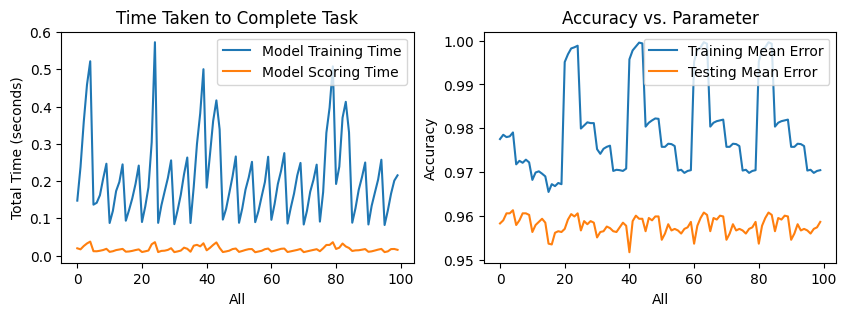

In [67]:
chart_single_param(grid_fine, param_label = 'All', score_label = 'Accuracy', single = False)

In [68]:
#results_table['x_parameter'].astype(str)

In [69]:
#grid_fine.cv_results_

####Tuning - 2 Parameters - Depth and Min Sample Leafs

In [70]:
#Grid Search

# Create the classifier
clf_fine_two = create_template_clf()

param_set = {'n_estimators' : 35}
print('Params to Set:', param_set, '\n')
clf_fine_two = clf_fine_two.set_params(**param_set)
print('All Params:', clf_fine_two.get_params(), '\n')

set_max_depth =        list(range(10, 31, 5)) # centered around 20
set_min_samples_leaf = list(range(1, 8, 2)) # centered around 4
print('set_max_depth =', set_max_depth)
print('set_min_samples_leaf =', set_min_samples_leaf)
print()

# Create list of parameters to use in experiment
parameters = {'max_depth'        : set_max_depth,
              'min_samples_leaf' : set_min_samples_leaf
              }

# Run the course grain test on the model
clf_fine_two = tune_multi_param(clf = clf_fine, data = dc, param = parameters, cv = 3)

Params to Set: {'n_estimators': 35} 

All Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 35, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False} 

set_max_depth = [10, 15, 20, 25, 30]
set_min_samples_leaf = [1, 3, 5, 7]

Fitting 3 folds for each of 20 candidates, totalling 60 fits



Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1}
Best Estimator:  RandomForestClassifier(max_depth=20, random_state=27)
Best Score:  0.9621938232161874
All Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False}

[{'max_depth': 10, 'min_samples_leaf': 1}, {'max_depth': 10, 'min_samples_leaf': 3}, {'max_depth': 10, 'min_samples_leaf': 5}, {'max_depth': 10, 'min_samples_leaf': 7}, {'max_depth': 15, 'min_samples_leaf': 1}, {'max_depth': 15, 'min_samples_leaf': 3}, {'max_depth': 15, 'min_samples_leaf': 5}, {'max_depth': 15, 'min_samples_leaf': 7}, {'max_depth': 20, 'min_samples_leaf': 1}, {'max_depth': 20, 'min_samples_leaf': 3}, {'max_dept

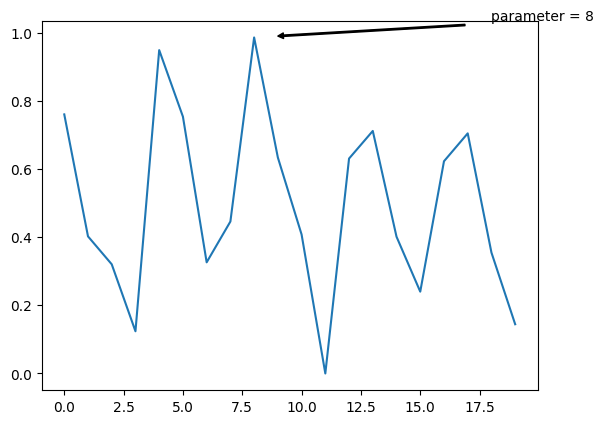

max value of 0.986 for the weighted selection score occurs at parameter = 8
The parameters set used is: {'max_depth': 20, 'min_samples_leaf': 1} 

Records Around the Best Weighted Selection Score: 
    param_label                               x_parameter  y_test_score  y_model_time  y_score_time  weighted_selection  weighted_selection_rank  y_test_score_rank  row_number
5          All  {'max_depth': 15, 'min_samples_leaf': 3}      0.961129      0.820871      0.045805            0.753653                      4.0                3.0           5
6          All  {'max_depth': 15, 'min_samples_leaf': 5}      0.959176      0.788493      0.044023            0.326171                     15.0               16.0           6
7          All  {'max_depth': 15, 'min_samples_leaf': 7}      0.959709      0.762011      0.043662            0.445954                     10.0               11.0           7
8          All  {'max_depth': 20, 'min_samples_leaf': 1}      0.962194      0.872432      0.046987   

<ipython-input-49-ebdd552f6c6c>:154: FutureWarning: Dropping of nuisance columns in Series.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  candidate_results_table ['x_parameter_rank'] = candidate_results_table['x_parameter'].rank(method='first', ascending = best_param_smallest)
<ipython-input-49-ebdd552f6c6c>:154: FutureWarning: Calling Series.rank with numeric_only=True and dtype object is deprecated and will raise a TypeError in a future version of pandas
  candidate_results_table ['x_parameter_rank'] = candidate_results_table['x_parameter'].rank(method='first', ascending = best_param_smallest)


In [71]:
# Display the best paramenter
print_grid_summary(clf_fine_two)
# create a results table
results_table = results_table_single_params(clf_fine_two, param_label = 'All', single = False)
# plot and identify the target param based on the max weighted selection score
target_param_value, max_score, target_index = results_plot_single_params(clf_fine_two, param_label = 'All', score_label = 'Weighted Selection Score', single = False)
# display a snapshot of the results table focused on the target parameter
support_table_weighted_selection_score (results_table)
# generate suggested candidate records
candidates = suggest_top_param_candidates(results_table, best_param_smallest = True, cutoff_margin = 0.005)
print('Parameter Options:', candidates)

[{'max_depth': 10, 'min_samples_leaf': 1}, {'max_depth': 10, 'min_samples_leaf': 3}, {'max_depth': 10, 'min_samples_leaf': 5}, {'max_depth': 10, 'min_samples_leaf': 7}, {'max_depth': 15, 'min_samples_leaf': 1}, {'max_depth': 15, 'min_samples_leaf': 3}, {'max_depth': 15, 'min_samples_leaf': 5}, {'max_depth': 15, 'min_samples_leaf': 7}, {'max_depth': 20, 'min_samples_leaf': 1}, {'max_depth': 20, 'min_samples_leaf': 3}, {'max_depth': 20, 'min_samples_leaf': 5}, {'max_depth': 20, 'min_samples_leaf': 7}, {'max_depth': 25, 'min_samples_leaf': 1}, {'max_depth': 25, 'min_samples_leaf': 3}, {'max_depth': 25, 'min_samples_leaf': 5}, {'max_depth': 25, 'min_samples_leaf': 7}, {'max_depth': 30, 'min_samples_leaf': 1}, {'max_depth': 30, 'min_samples_leaf': 3}, {'max_depth': 30, 'min_samples_leaf': 5}, {'max_depth': 30, 'min_samples_leaf': 7}]


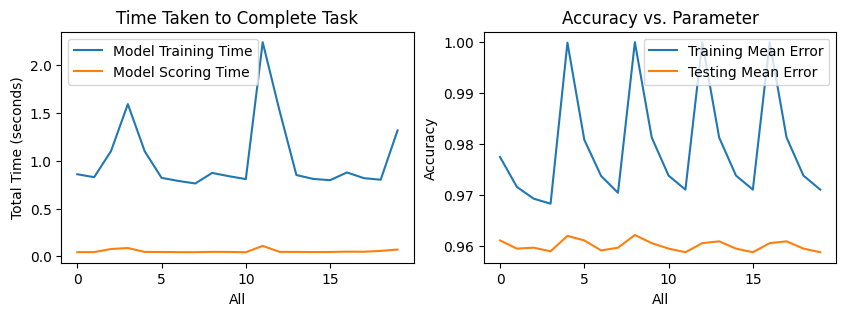

In [72]:
chart_single_param(clf_fine_two, param_label = 'All', score_label = 'Accuracy', single = False)

In [73]:
param_1 = 'max_depth'
param_2 = 'min_samples_leaf'
scores = [x for x in clf_fine_two.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(clf_fine_two.param_grid[param_1]), len(clf_fine_two.param_grid[param_2]))
print(scores)

plotSearchGrid(grid = clf_fine_two, param_1 = 'max_depth', param_2 = 'min_samples_leaf', target_score = 'weighted_selection') # alternative 'y_test_score'

[[0.96112886 0.95953142 0.95970891 0.95899894]
 [0.96201633 0.96112886 0.95917643 0.95970891]
 [0.96219382 0.96059638 0.95953142 0.95882144]
 [0.96059638 0.96095137 0.95953142 0.95882144]
 [0.96059638 0.96095137 0.95953142 0.95882144]]


[{'max_depth': 10, 'min_samples_leaf': 1}, {'max_depth': 10, 'min_samples_leaf': 3}, {'max_depth': 10, 'min_samples_leaf': 5}, {'max_depth': 10, 'min_samples_leaf': 7}, {'max_depth': 15, 'min_samples_leaf': 1}, {'max_depth': 15, 'min_samples_leaf': 3}, {'max_depth': 15, 'min_samples_leaf': 5}, {'max_depth': 15, 'min_samples_leaf': 7}, {'max_depth': 20, 'min_samples_leaf': 1}, {'max_depth': 20, 'min_samples_leaf': 3}, {'max_depth': 20, 'min_samples_leaf': 5}, {'max_depth': 20, 'min_samples_leaf': 7}, {'max_depth': 25, 'min_samples_leaf': 1}, {'max_depth': 25, 'min_samples_leaf': 3}, {'max_depth': 25, 'min_samples_leaf': 5}, {'max_depth': 25, 'min_samples_leaf': 7}, {'max_depth': 30, 'min_samples_leaf': 1}, {'max_depth': 30, 'min_samples_leaf': 3}, {'max_depth': 30, 'min_samples_leaf': 5}, {'max_depth': 30, 'min_samples_leaf': 7}]


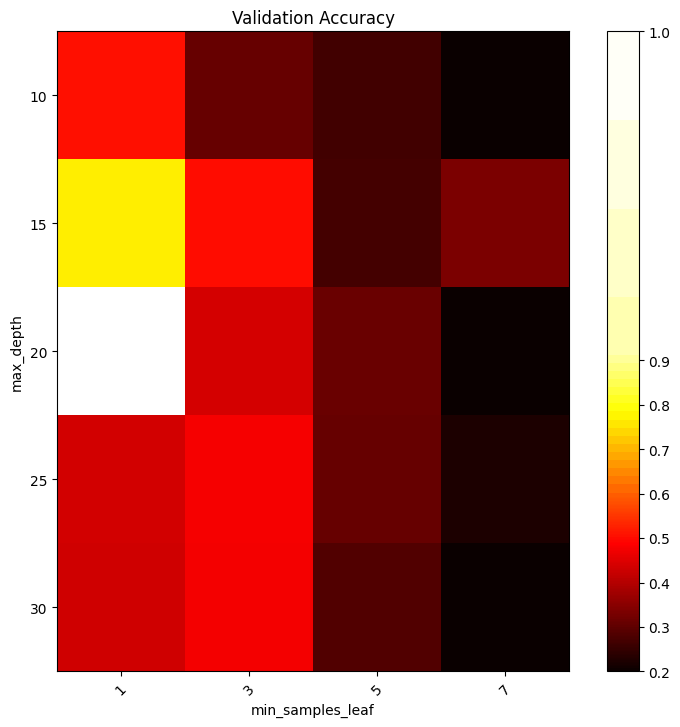

### Fine Grain - Model Evaluation

In [75]:
# Create the fine grain model model
clf_fine = create_template_clf()

param_set = {'n_estimators' : 20, 'max_depth' : 10, 'min_samples_leaf' : 1}
print('Params to Set:', param_set, '\n')
clf_fine = clf_fine.set_params(**param_set)
print('All Params:', clf_fine.get_params(), '\n')

clf_fine.fit(dc.x_train_dummies, dc.y_train)

Params to Set: {'n_estimators': 20, 'max_depth': 10, 'min_samples_leaf': 1} 

All Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 27, 'verbose': 0, 'warm_start': False} 



RandomForestClassifier(max_depth=10, n_estimators=20, random_state=27)

In [76]:
# Assess the model against the holdout data
score_h_course = score_holdout(clf = clf_course, X = dc.x_test_dummies, y = dc.y_test)
# Assess the model in a k-fold framework
score_k_course, dict_scores_course = score_kfold(clf = clf_course, X = dc.X_dummies, y = dc.y)

In [77]:
# Course Tuned baseline model in the tracker
model_tracker = add_model_to_tracker(model_tracker = model_tracker, model_name = 'Fine Tuned', score_k = score_k_course)
#print(model_tracker)
df_mt = pd.DataFrame(model_tracker)
df_mt

,Model,Mean Accuracy,Mean ROC AUC,Fit Time,Score Time
0,Baseline,0.963,0.938,0.909,0.040
1,Course Tuned,0.961,0.934,0.226,0.022
2,Fine Tuned,0.961,0.934,0.203,0.018


##7.5.&nbsp;Feature Importance

In [78]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

# create an analysis table of feature importance
def feature_importance(dc, clf):
  import time
  import numpy as np
  import pandas as pd

  # Extract the feature names to match the order of the model
  feature_names = dc.x_train_dummies.columns

  # Calculate the importance and the standard error for each feature
  start_time = time.time()
  importances = clf.feature_importances_
  std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
  elapsed_time = time.time() - start_time

  # Create dataframe to store the feature importance
  forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
  frame = {'Feature' : forest_importances.index,
          'Importance' : round(forest_importances, 3),
          'Std' : std,
          'Cumulative Importance' : np.cumsum(round(forest_importances, 3))}
  fi_df = pd.DataFrame(frame).reset_index(drop=True)

  print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds\n")

  return fi_df

# create a feature importance chart
def feature_imortance_chart(fi_df, top_x = 15):
  fig, ax = plt.subplots(figsize=(10,5))
  fi_df.head(top_x).drop(columns=['Cumulative Importance']).plot.bar('Feature', yerr='Std', ax=ax)
  ax.set_title("Feature Importances Using MDI")
  ax.set_ylabel("Mean Decrease in Impurity")
  fig.tight_layout()

# create a cumulative feature importance chart
def feature_imortance_cum_chart(fi_df, top_x = 15):
  x = list(fi_df.head(top_x)['Feature'])
  y = list(fi_df.head(top_x)['Cumulative Importance'])

  fig, ax = plt.subplots(figsize=(10,5))
  plt.plot(x, y)
  plt.title("Cumulative Feature Importances Using MDI")
  plt.ylabel("Cumulative Decrease in Impurity")
  plt.xlabel("Features")
  plt.ylim([0.3, 1])
  plt.xticks(rotation = 'vertical')
  plt.hlines(y = 0.95, xmin=0, xmax=top_x, linestyles = 'dashed')
  fig.tight_layout()

Elapsed time to compute the importances: 0.077 seconds

Top 10 Features by Importance:
                               Feature  Importance       Std  Cumulative Importance
0                  Satisfaction Score       0.437  0.015256                  0.437
1             Contract_Month-to-Month       0.064  0.001512                  0.501
2                    Tenure in Months       0.047  0.012257                  0.548
3                      Monthly Charge       0.042  0.003129                  0.590
4                       Total Charges       0.035  0.015539                  0.625
5                 Number of Referrals       0.035  0.016021                  0.660
6                       Total Revenue       0.032  0.008589                  0.692
7                                 Age       0.028  0.003785                  0.720
8         Total Long Distance Charges       0.026  0.031652                  0.746
9                          Population       0.022  0.042497                  0.768

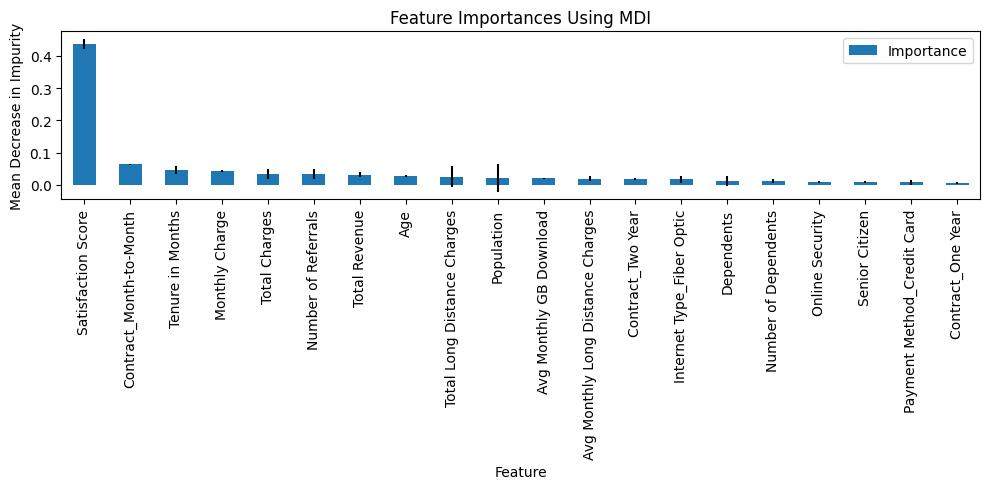

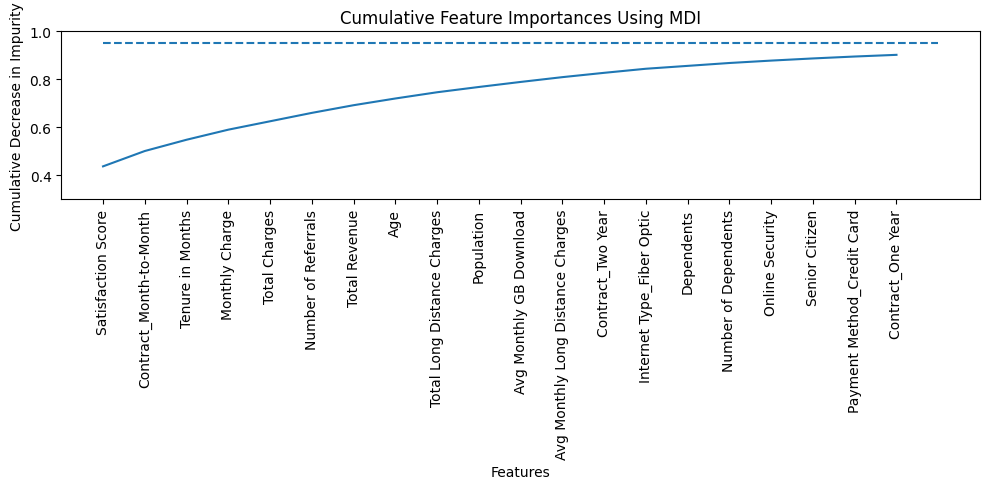

In [80]:
# create the feature importance analysis
fi_df = feature_importance(dc, clf_baseline)
top_x = 20
# print a table of feature importance
print('Top 10 Features by Importance:\n', fi_df.head(top_x), '\n')
# Create a chart of the feature importance
feature_imortance_chart(fi_df, top_x = top_x)
feature_imortance_cum_chart(fi_df, top_x = top_x)

In [81]:
list(fi_df.head(15)['Feature'])

['Satisfaction Score',
 'Contract_Month-to-Month',
 'Tenure in Months',
 'Monthly Charge',
 'Total Charges',
 'Number of Referrals',
 'Total Revenue',
 'Age',
 'Total Long Distance Charges',
 'Population',
 'Avg Monthly GB Download',
 'Avg Monthly Long Distance Charges',
 'Contract_Two Year',
 'Internet Type_Fiber Optic',
 'Dependents']

# 8.&nbsp;Results and Analysis

## Base Model Performance

## Iterative Model Improvements

## Final Model Performance

# 9.&nbsp;Conclusion

## Learning and Takeaways

## Issues or Flaws in the Approach

## Suggested Improvements

# 10.&nbsp;References

## Useful Documentation
*   **sklearn.ensemble.GradientBoostingClassifier** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
*   **XGBoost Python Package: Python API Reference** https://xgboost.readthedocs.io/en/stable/python/python_api.html
*   **Kaggle: Using XGBoost with Scikit-learn** https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn
*   **SciKit-Learn: 1.13. Feature Selection** https://scikit-learn.org/stable/modules/feature_selection.html
*   **SciKit-Learn: 3.3. Metrics and scoring: quantifying the quality of predictions** https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
*   **ProductPlan: Churn** https://www.productplan.com/glossary/churn/


## References
- **[1] Customer Attrition**
  - **Type:** Background Document
  - **Link:** https://en.wikipedia.org/wiki/Customer_attrition
  - **Purpose:** Support details on project focus
  - **Purpose Description:** Additional details and research on project focus to establish relevancy an why a model should be created.

* **[2] Telco customer churn (11.1.3+)**
  * **Type:** Reference Document
  * **Link:** https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
  * **Purpose:** Source of Data Dictionary
  * **Purpose Description:** Documentation created by the IBM Samples Team that outlines the collection of sample data an assets as well as defines data fields in a data dictionary

* **[3] Kaggle: Telco customer churn (11.1.3+)**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
  * **Purpose:** Dataset Source
  * **Purpose Description:** Public Kaggle Datasource where the IMB CUstomer Churn data files are shared as separate table aligned to original data model. Secondary source of a data dictionary for files

* **[4] Predict Customer Churn using Watson Machine Learning and Jupyter Notebooks on Cloud Pak for Data**
 * **Type:** Github Repository
 * **Link:** https://github.com/IBM/telco-customer-churn-on-icp4d#3-upload-the-dataset
  * **Purpose:** General Reference
  * **Purpose Description:** General reference of an application an analysis of curn data files from IBM.  Consolidated data file (looking for split data files to use in data prep).

* **[5] A Survey on Machine Learning Methods for Churn Prediction**
 * **Type:** Academic Paper
 * **Link:** https://hal.science/hal-03824873
  * **Purpose:** General Reference
  * **Purpose Description:** Detailed academic paper on Churn Prediction. Provides a table of many curn data source that could potentially be used for general model analysis and application.

* **[6] Kaggle: Telco customer churn: IBM dataset**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Alternae source of data from Kaggle.  This data is consolidated into a single file and is not used, as I would like to start with the raw data files as far upstream as possible.

* **[7] Maven: Telecom Customer Churn**
 * **Type:** Maven Dataset
 * **Link:** https://www.mavenanalytics.io/data-playground?pageSize=20
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Well curated Telco Customer Churn dataset sourced from the IBM Cognos Analytics source.  Likely more refined as a starting point than I am looking to use for this analysis.

* **[8] Analyzing Customer Churn in Telecom**
 * **Type:** Blog Post
 * **Link:** https://medium.com/@odmirajkar/analyzing-customer-churn-in-telecom-f928c8119244
  * **Purpose:** General Reference
  * **Purpose Description:** Lightweight blog post on analyzing customer curn in Telecom. Establish foundation and commonality of this type of analysis occuring as a demonstration and project.

* **[9] Customer Churn Prediction**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://deepnote.com/@flsbustamante/customer-churn-prediction-8eac729e-7ba2-4fb2-9ce0-7018e476d572
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.

* **[10] End-to-end machine learning project: Telco customer churn**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.

* **[11] sklearn.ensemble.RandomForestClassifier**
 * **Type:** Python Scikit Learn Documentation
 * **Link:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * **Purpose:** Product Documentation
  * **Purpose Description:** Definition of Random Forest. Parameters, functions, and sample code.